# Installation and Import of packages, mount the drive

pip install dataframe_image, the package to display the table from dataframe


In [55]:
# pip install dataframe-image

In [56]:
# Import the packages 
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import table
import dataframe_image as dfi

In [57]:
# from google.colab import drive
# drive.mount('/content/drive')

# A scheme Beyond PPM

We temporarily call the scheme as Jonas. \\
We have 4 photons
<br>
14 timeslots
<br>
1 symbol created by 14 timeslots

A1. The number of slots n with Jonas method. n=Sum(First k integers in the series) \\

A2. The number of possible symbols, m, will be m=k \\

A3. The number of bits (the information content per symbol) will be b=log2(m) \\


## Sequence to design the length of time slot / time bin
We can generate the desired number of sequence we want from the below code.

A010672		A B_2 sequence: a(n) = least value such that sequence increases and pairwise sums of distinct elements are all distinct. \\
Author: 	Dan Hoey

1. https://oeis.org/A010672
2. https://oeis.org/A011185
3. https://oeis.org/A010672

The below function generates a list of 100 sequences.

In [58]:
from itertools import islice

def agen(): # generator of terms

    aset, sset, k = set(), set(), 0

    while True:

        k += 1

        while any(k+an in sset for an in aset): k += 1

        yield k; sset.update(k+an for an in aset); aset.add(k)
        
sequence = list(islice(agen(), 100))
photon = list(map(lambda v: v-1, sequence[1:]))
print(photon)

[1, 2, 4, 7, 12, 20, 29, 38, 52, 73, 94, 127, 151, 181, 211, 257, 315, 373, 412, 475, 530, 545, 607, 716, 797, 861, 964, 1059, 1160, 1306, 1385, 1434, 1555, 1721, 1833, 1933, 2057, 2260, 2496, 2698, 2873, 3060, 3196, 3331, 3628, 3711, 3867, 4139, 4446, 4639, 5021, 5064, 5322, 5613, 6003, 6273, 6493, 6641, 6979, 7275, 7587, 8017, 8373, 9071, 9167, 9760, 10105, 10489, 11109, 11374, 11516, 12101, 12330, 12867, 13426, 13923, 14535, 14911, 15469, 15904, 16136, 16900, 17041, 17822, 19421, 19933, 20288, 20996, 21491, 22065, 22612, 22659, 23724, 24399, 24969, 25360, 26071, 26680, 27601]


In [59]:
len(photon)

99

## The Number of Time Bin (Time Slot)
Let us consider the following sequence:
[0, 1, 2, 4, 7, 12, 20, 29, 38, 52, 73, 94, 127] as an example

Since we should have at least 1 photon in a time slot, we drop out the 1st term and start with the value 1.

The length of the nth time bin is the sum of the first nth sequence. 

In [60]:
length = [sum(photon[:i]) for i in range(1,len(photon)+1)]
print (length)

[1, 3, 7, 14, 26, 46, 75, 113, 165, 238, 332, 459, 610, 791, 1002, 1259, 1574, 1947, 2359, 2834, 3364, 3909, 4516, 5232, 6029, 6890, 7854, 8913, 10073, 11379, 12764, 14198, 15753, 17474, 19307, 21240, 23297, 25557, 28053, 30751, 33624, 36684, 39880, 43211, 46839, 50550, 54417, 58556, 63002, 67641, 72662, 77726, 83048, 88661, 94664, 100937, 107430, 114071, 121050, 128325, 135912, 143929, 152302, 161373, 170540, 180300, 190405, 200894, 212003, 223377, 234893, 246994, 259324, 272191, 285617, 299540, 314075, 328986, 344455, 360359, 376495, 393395, 410436, 428258, 447679, 467612, 487900, 508896, 530387, 552452, 575064, 597723, 621447, 645846, 670815, 696175, 722246, 748926, 776527]


If we have 4 photons to encode into the superblock. We represent them into a sequence in a list as [1,2,4,7], which is encoded as follow: \\
H H0 H000 V000000, which comprie of 14 time slots.
We can find all the permutation, i.e. the number of ways to order them, which is 4! = 24. It means that we have 24 possible way to represent a symbol in this time bin.

In [61]:
# A Python program to print all 
# permutations using library function 
from itertools import permutations 
  
  
# Get all permutations of [1, 2, 3] 
perm = permutations([1, 2, 4, 7]) 

lists = []
# Print the obtained permutations 
for i in (perm): 
    #print (i)
    lists.append(i) 

lists

[(1, 2, 4, 7),
 (1, 2, 7, 4),
 (1, 4, 2, 7),
 (1, 4, 7, 2),
 (1, 7, 2, 4),
 (1, 7, 4, 2),
 (2, 1, 4, 7),
 (2, 1, 7, 4),
 (2, 4, 1, 7),
 (2, 4, 7, 1),
 (2, 7, 1, 4),
 (2, 7, 4, 1),
 (4, 1, 2, 7),
 (4, 1, 7, 2),
 (4, 2, 1, 7),
 (4, 2, 7, 1),
 (4, 7, 1, 2),
 (4, 7, 2, 1),
 (7, 1, 2, 4),
 (7, 1, 4, 2),
 (7, 2, 1, 4),
 (7, 2, 4, 1),
 (7, 4, 1, 2),
 (7, 4, 2, 1)]

# Number of ways to order the photons
$$n!$$

In [62]:
def ways(n):
    return math.factorial(n)

# Number of Bits per Symbol
It is the information content per symbol

$$ log_2{n!}$$

In [63]:
def bps(W):
    return math.log2(W)

# Number of Bits per Photon

math.log2(Jonasways) / n

$$ log_2\frac{{n!}}{n}$$


In [64]:
def bpph(b,n):
    return b/n

# Number of Bits per Time Bin

$$ log_2\frac{{n!}}{n} \times \frac{n}{T}$$


In [65]:
def bpt(B, n, T):
    return B*n/T

In [66]:
bpph(bps(24), 4)*4/14

0.3274973214800826

# Putting all the functions together

In [67]:
# series, series[4]

In [68]:
Jonasnumber = []
JonasPermutation = []
JonasBPS = []
JonasBPP = []
JonasBPT = []


series = [1, 3, 7, 14, 26, 46, 75, 113, 165, 238, 332, 459, 610, 791, 1002, 1259, 1574, 1947, 2359, 2834, 3364, 3909, 4516, 5232, 6029, 6890, 7854, 8913, 10073, 11379, 12764, 14198, 15753, 17474, 19307, 21240]

df_Jonas = pd.DataFrame(columns=['Number of Photon', 
                           'Time Bins',
                           'Permutation',
                           'Bits/Symbol', 
                           'Bits/Photon', 
                           'Bits/Time Bin']
                  )

for n in range(1,21):
    Jonasways = math.factorial(n)         # A2. The number of possible symbols, m, will be m=k \\
    JonasTimeBin = series[n-1]            # A1. The number of slots n with Jonas method. n=Sum(First k integers in the series) \\
    Jonasbps = math.log2(Jonasways)       # A3. The number of bits (the information content per symbol) will be b=log2(m)   
    Jonasbpp = math.log2(Jonasways) / n
    Jonasbpt = Jonasbpp * n/series[n-1]

    JonasTimeBin_SigFig = "{:.2e}".format(JonasTimeBin)
    Jonasways_SigFig = "{:.2e}".format(Jonasways)
    Jonasbps_round = round(Jonasbps, 2)
    Jonasbpp_round = round(Jonasbpp, 2)
    Jonasbpt_round = round(Jonasbpt, 2)
    df_Jonas.loc[len(df_Jonas)] = [n, JonasTimeBin, Jonasways_SigFig, Jonasbps_round, Jonasbpp_round, Jonasbpt_round] 

In [69]:
df_Jonas # 4th one data is correct

,Number of Photon,Time Bins,Permutation,Bits/Symbol,Bits/Photon,Bits/Time Bin
0,1,1,1.00e+00,0.00,0.00,0.00
1,2,3,2.00e+00,1.00,0.50,0.33
2,3,7,6.00e+00,2.58,0.86,0.37
3,4,14,2.40e+01,4.58,1.15,0.33
4,5,26,1.20e+02,6.91,1.38,0.27
5,6,46,7.20e+02,9.49,1.58,0.21
6,7,75,5.04e+03,12.30,1.76,0.16
7,8,113,4.03e+04,15.30,1.91,0.14
8,9,165,3.63e+05,18.47,2.05,0.11
9,10,238,3.63e+06,21.79,2.18,0.09


In [70]:
df_Jonas[df_Jonas.columns[0]]

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
Name: Number of Photon, dtype: int64

In [71]:
#df_Jonas = df_Jonas.style.background_gradient() #adding a gradient based on values in cell
dfi.export(
    df_Jonas,
    "protocol/Jonas_Table.png",
    table_conversion="matplotlib"
)

In [72]:
df_Jonas.columns[1]

'Time Bins'

# Plot Graph

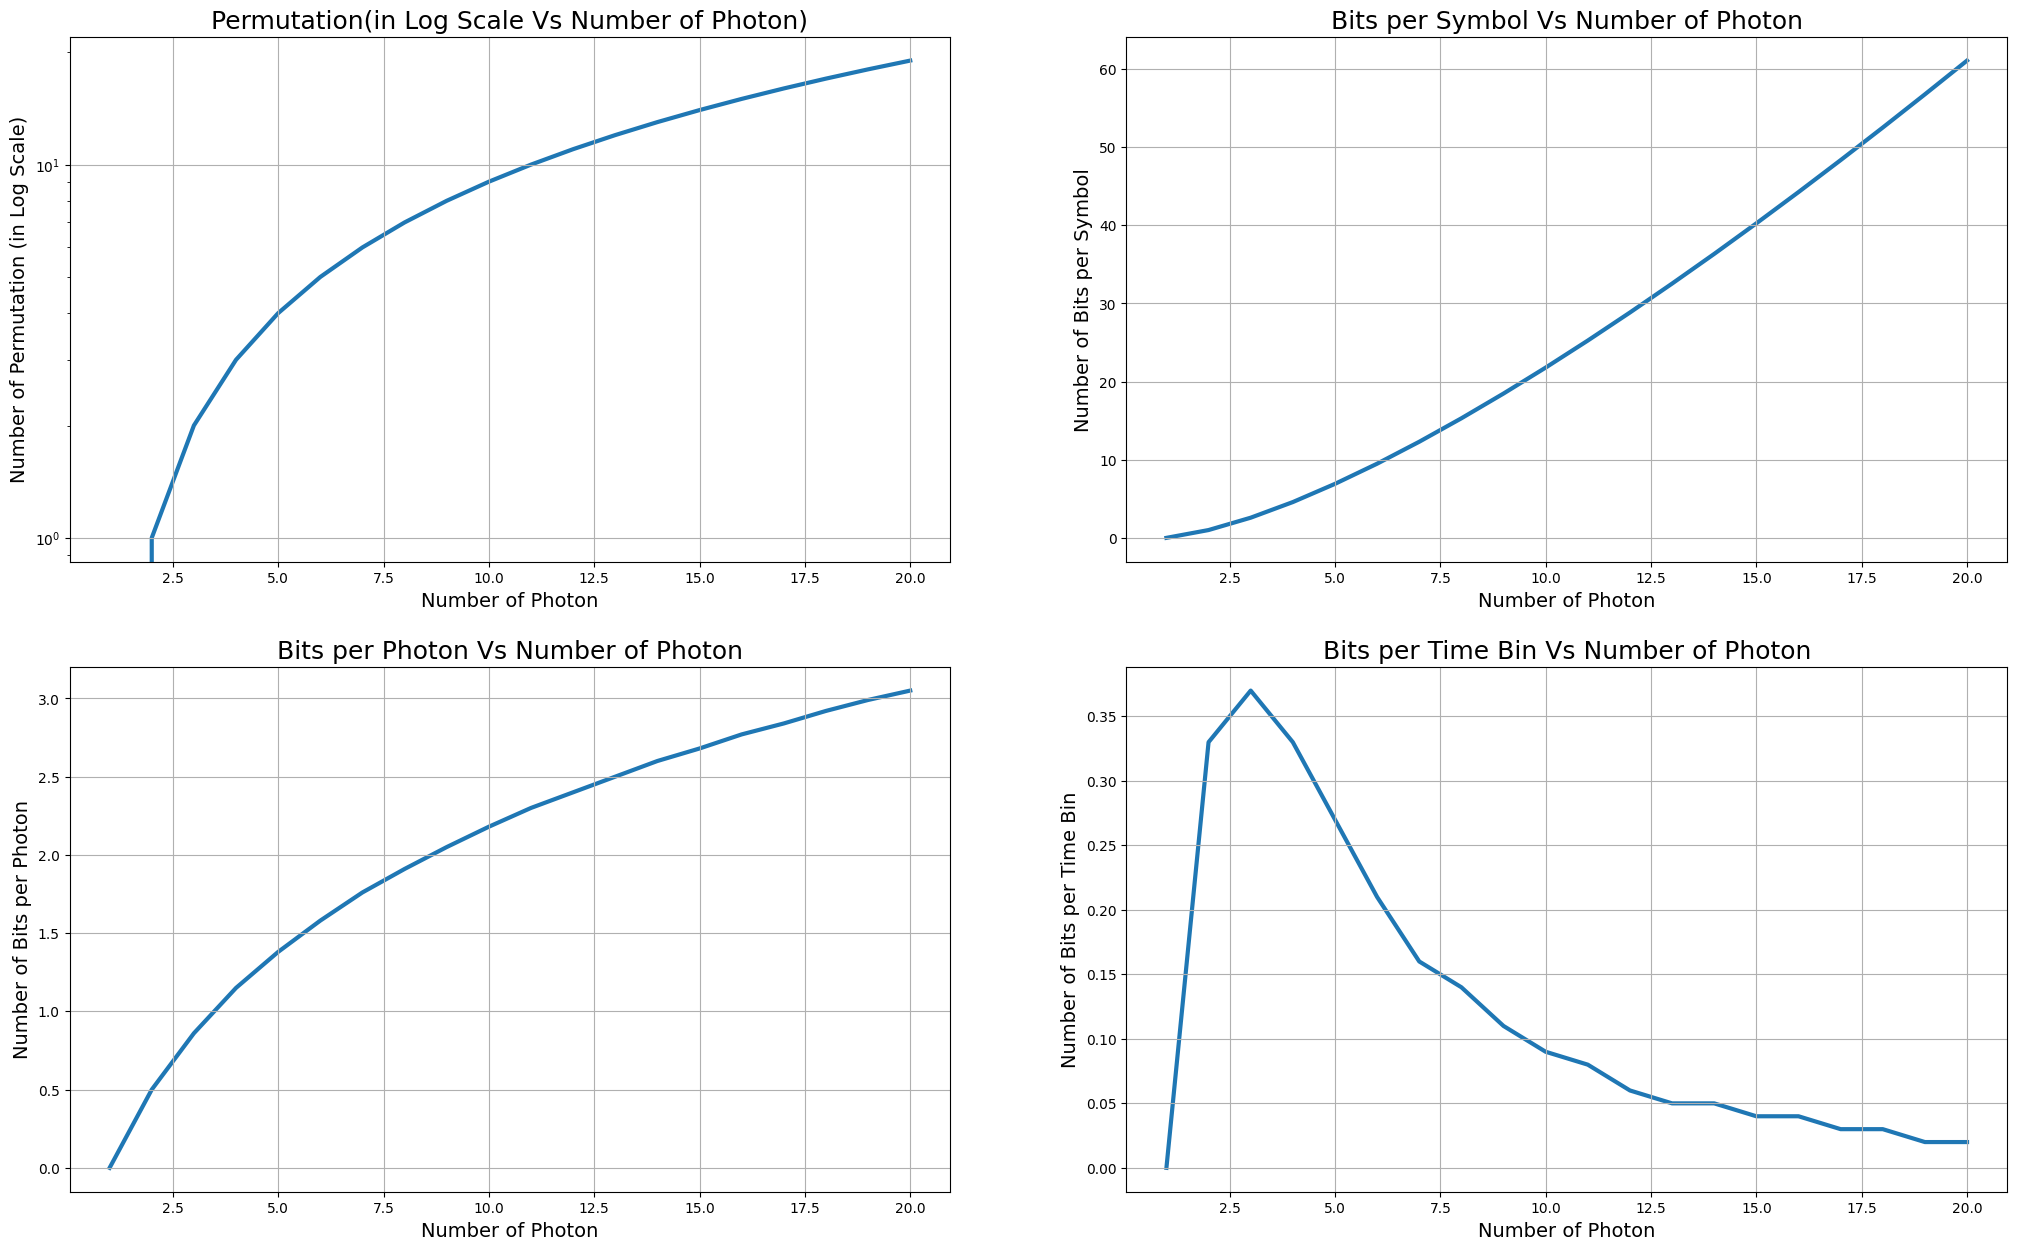

In [73]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_Jonas[df_Jonas.columns[0]],df_Jonas[df_Jonas.columns[2]],linewidth=3,zorder=1, label = "bits")
axis[0, 0].set_title('Permutation(in Log Scale Vs Number of Photon)', fontsize = 18)
axis[0, 0].set_xlabel('Number of Photon', fontsize = 14)
axis[0, 0].set_ylabel('Number of Permutation (in Log Scale)', fontsize = 14)
axis[0, 0].set_yscale('log')
#axis[0, 0].set_xlim([0, 21])
axis[0, 0].grid(True)

axis[0, 1].plot(df_Jonas[df_Jonas.columns[0]],df_Jonas[df_Jonas.columns[3]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Bits per Symbol Vs Number of Photon', fontsize = 18)
axis[0, 1].set_xlabel('Number of Photon', fontsize = 14)
axis[0, 1].set_ylabel('Number of Bits per Symbol', fontsize = 14)
axis[0, 1].grid(True)

axis[1, 0].plot(df_Jonas[df_Jonas.columns[0]],df_Jonas[df_Jonas.columns[4]],linewidth=3,zorder=1, label = "bits")

axis[1, 0].set_title('Bits per Photon Vs Number of Photon', fontsize = 18)
axis[1, 0].set_xlabel('Number of Photon', fontsize = 14)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 14)
axis[1, 0].grid(True)

axis[1, 1].plot(df_Jonas[df_Jonas.columns[0]],df_Jonas[df_Jonas.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Bits per Time Bin Vs Number of Photon', fontsize = 18)
axis[1, 1].set_xlabel('Number of Photon', fontsize = 14)
axis[1, 1].set_ylabel('Number of Bits per Time Bin', fontsize = 14)
axis[1, 1].grid(True)

figure.set_facecolor("white")
plt.savefig('protocol/Jonas_Photon_Plot.png', dpi=450, bbox_inches='tight')
plt.show()

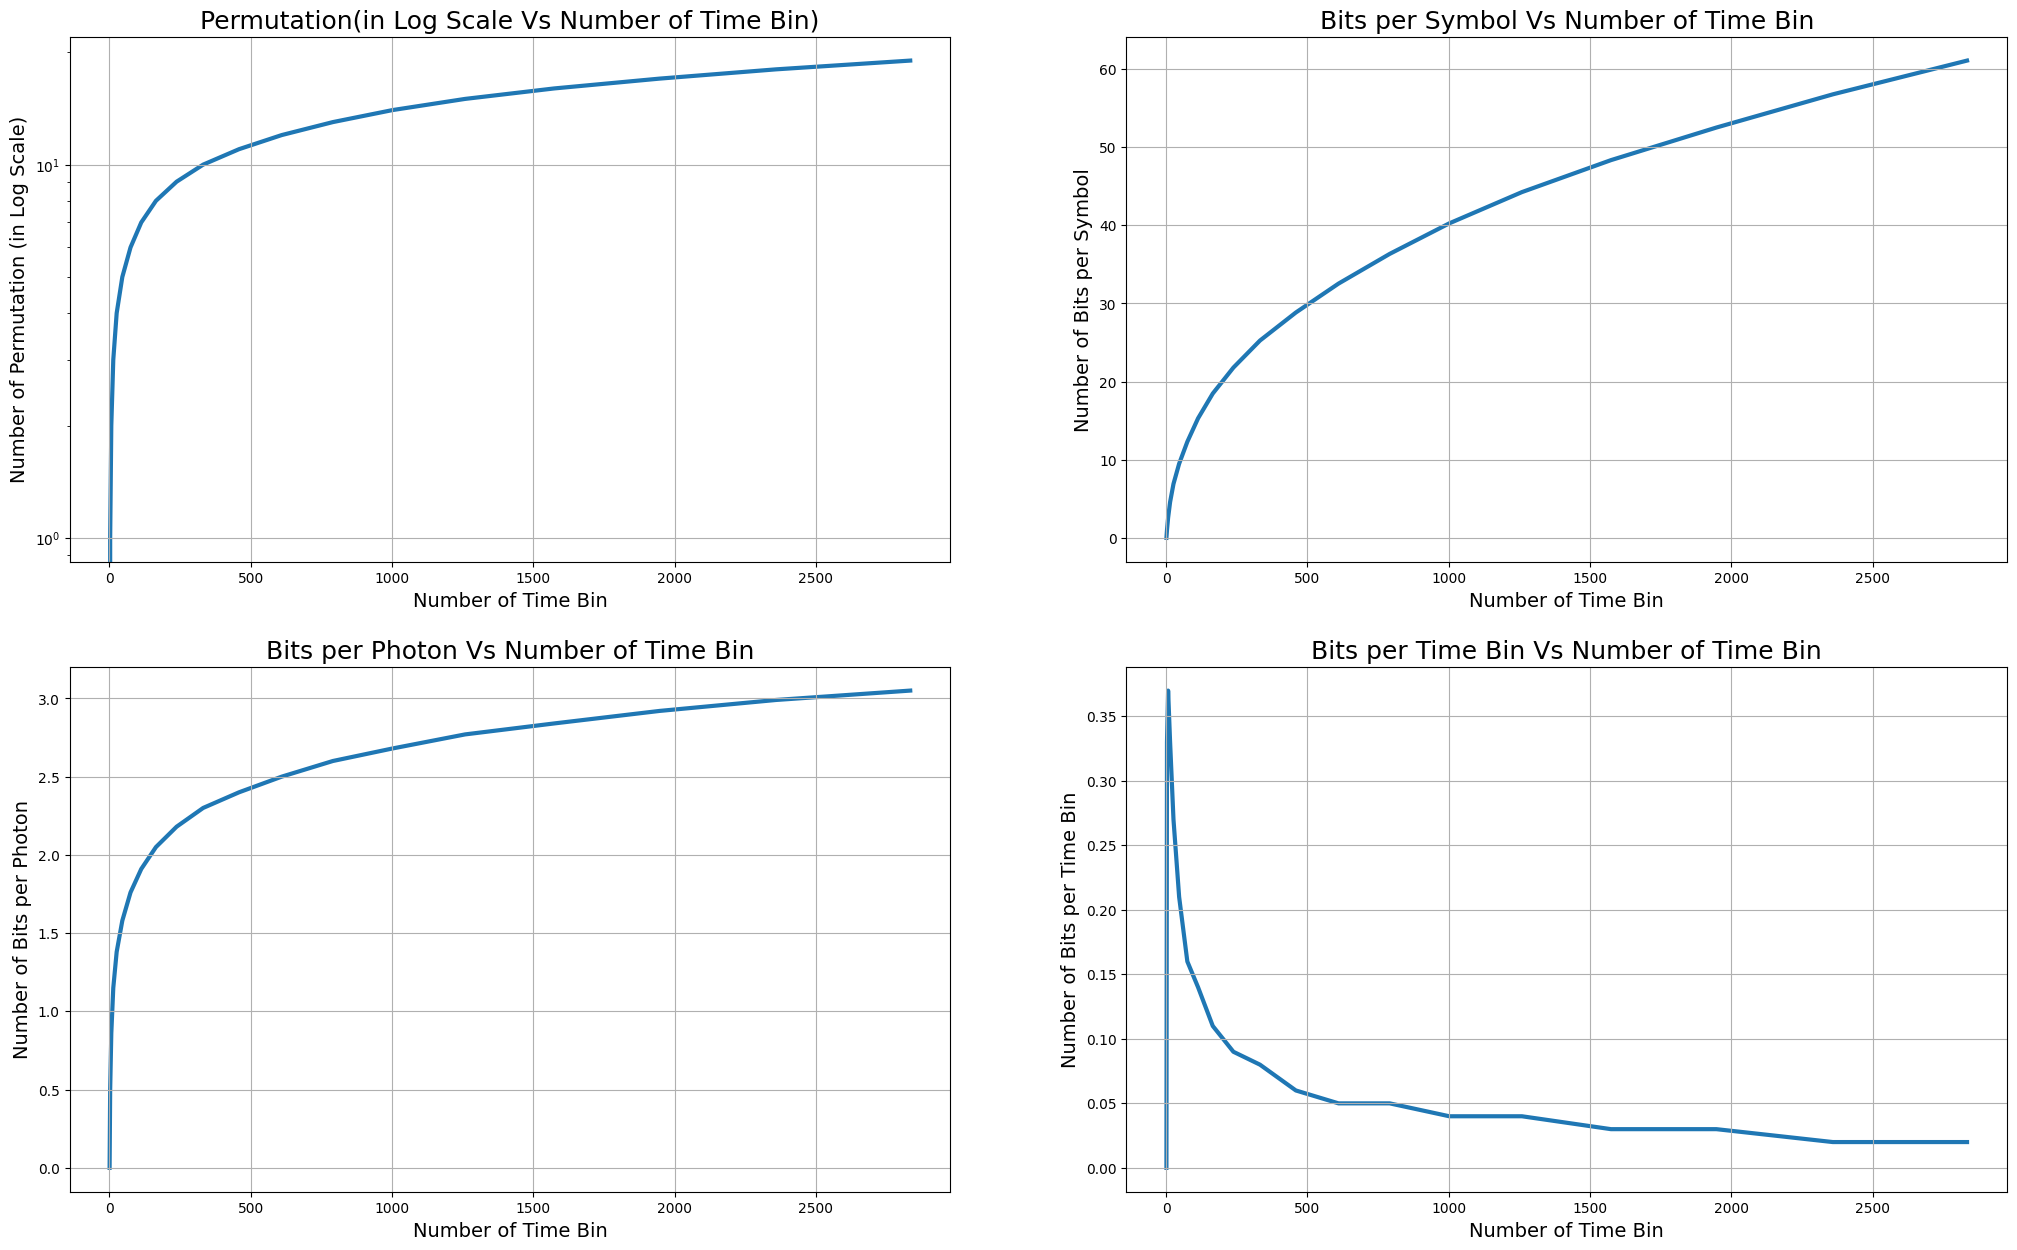

In [74]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_Jonas[df_Jonas.columns[1]],df_Jonas[df_Jonas.columns[2]],linewidth=3,zorder=1, label = "bits")
axis[0, 0].set_title('Permutation(in Log Scale Vs Number of Time Bin)', fontsize = 18)
axis[0, 0].set_xlabel('Number of Time Bin', fontsize = 14)
axis[0, 0].set_ylabel('Number of Permutation (in Log Scale)', fontsize = 14)
axis[0, 0].set_yscale('log')
#axis[0, 0].set_xlim([0, 21])
axis[0, 0].grid(True)

axis[0, 1].plot(df_Jonas[df_Jonas.columns[1]],df_Jonas[df_Jonas.columns[3]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Bits per Symbol Vs Number of Time Bin', fontsize = 18)
axis[0, 1].set_xlabel('Number of Time Bin', fontsize = 14)
axis[0, 1].set_ylabel('Number of Bits per Symbol', fontsize = 14)
axis[0, 1].grid(True)

axis[1, 0].plot(df_Jonas[df_Jonas.columns[1]],df_Jonas[df_Jonas.columns[4]],linewidth=3,zorder=1, label = "bits")

axis[1, 0].set_title('Bits per Photon Vs Number of Time Bin', fontsize = 18)
axis[1, 0].set_xlabel('Number of Time Bin', fontsize = 14)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 14)
axis[1, 0].grid(True)

axis[1, 1].plot(df_Jonas[df_Jonas.columns[1]],df_Jonas[df_Jonas.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Bits per Time Bin Vs Number of Time Bin', fontsize = 18)
axis[1, 1].set_xlabel('Number of Time Bin', fontsize = 14)
axis[1, 1].set_ylabel('Number of Bits per Time Bin', fontsize = 14)
axis[1, 1].grid(True)

figure.set_facecolor("white")
plt.savefig('protocol/Jona_Time_Plot.png', dpi=450, bbox_inches='tight')
plt.show()

# General

The number of symbols m in general method will be the number ow ways k photons can be placed in n bins, i.e. 

$$m= \binom{n}{k}$$

If we have 4 photons, 14 timeslots, then there will be 1,0001 ways to order them by binomial where order does not matter.

The number of bits (the information content per symbol) will be 
$$b=log_2m$$

However, if we consider the repeition are not allowed, then we use 
Permutations = r! x Combinations 

B1. Compare with "general" method using same number of slots, n, and same number of photons, k \\

B2. The number of symbols m in general method will be the number ow ways k photons can be placed in n bins, i.e. m=(n over k) \\

B3. The number of bits (the information content per symbol) will be b=log2(m)


### Combination

In [75]:
def combination(n,r):
  return math.factorial(n) / (math.factorial(n-r)*math.factorial(r))

combination(14,4)

1001.0

In [76]:
Generalnumber_c = []
GeneralPermutation_c = []
GeneralBPS_c = []
GeneralBPP_c = []
GeneralBPT_c = []

series = [1, 3, 7, 14, 26, 46, 75, 113, 165, 238, 332, 459, 610, 791, 1002, 1259, 1574, 1947, 2359, 2834, 3364, 3909, 4516, 5232, 6029, 6890, 7854, 8913, 10073, 11379, 12764, 14198, 15753, 17474, 19307, 21240]

df_General_c = pd.DataFrame(columns=['Number of Photon', 
                           'Time Bins',          
                           'Permutation', 
                           'Bits/Symbol', 
                           'Bits/Photon', 
                           'Bits/Time Bin']
                  )

for n in range(1,21):
    Generalways_c = combination(series[n-1],n)    # B2. The number of symbols m in general method will be 
                                                  # the number ow ways k photons can be placed in n bins, i.e. m=(n over k) \\
    GeneralTimeBin = series[n-1]                  # B1. Compare with "general" method using same number of slots, n, 
                                                  # and same number of photons, k \\
    Generalbps_c = math.log2(Generalways_c)       # B3. The number of bits (the information content per symbol) will be b=log2(m)
    Generalbpp_c = math.log2(Generalways_c) / n
    Generalbpt_c = Generalbpp_c * n/series[n-1]

    GeneralTimeBin_SigFig_c = "{:.2e}".format(GeneralTimeBin)
    Generalways_SigFig_c = "{:.2e}".format(Generalways_c)
    Generalbps_round_c = round(Generalbps_c, 2)
    Generalbpp_round_c = round(Generalbpp_c, 2)
    Generalbpt_round_c = round(Generalbpt_c, 2)

    df_General_c.loc[len(df_General_c)+1] = [n, GeneralTimeBin, Generalways_c, Generalbps_round_c , Generalbpp_round_c, Generalbpt_round_c]


    #round(answer, 2)

In [77]:
# The first is zero because, the first item in the time bin is 1, which give the log based 2 to be 0.
math.log2(combination(1,1))

0.0

In [78]:
df_General_c # the 4 data is correct

,Number of Photon,Time Bins,Permutation,Bits/Symbol,Bits/Photon,Bits/Time Bin
1,1.0,1.0,1.000000e+00,0.00,0.00,0.00
2,2.0,3.0,3.000000e+00,1.58,0.79,0.53
3,3.0,7.0,3.500000e+01,5.13,1.71,0.73
4,4.0,14.0,1.001000e+03,9.97,2.49,0.71
5,5.0,26.0,6.578000e+04,16.01,3.20,0.62
6,6.0,46.0,9.366819e+06,23.16,3.86,0.50
7,7.0,75.0,1.984830e+09,30.89,4.41,0.41
8,8.0,113.0,5.117190e+11,38.90,4.86,0.34
9,9.0,165.0,2.000631e+14,47.51,5.28,0.29
10,10.0,238.0,1.326714e+17,56.88,5.69,0.24


In [79]:
dfi.export(
    df_General_c,
    "protocol/General_c_Table.png",
    table_conversion="matplotlib"
)

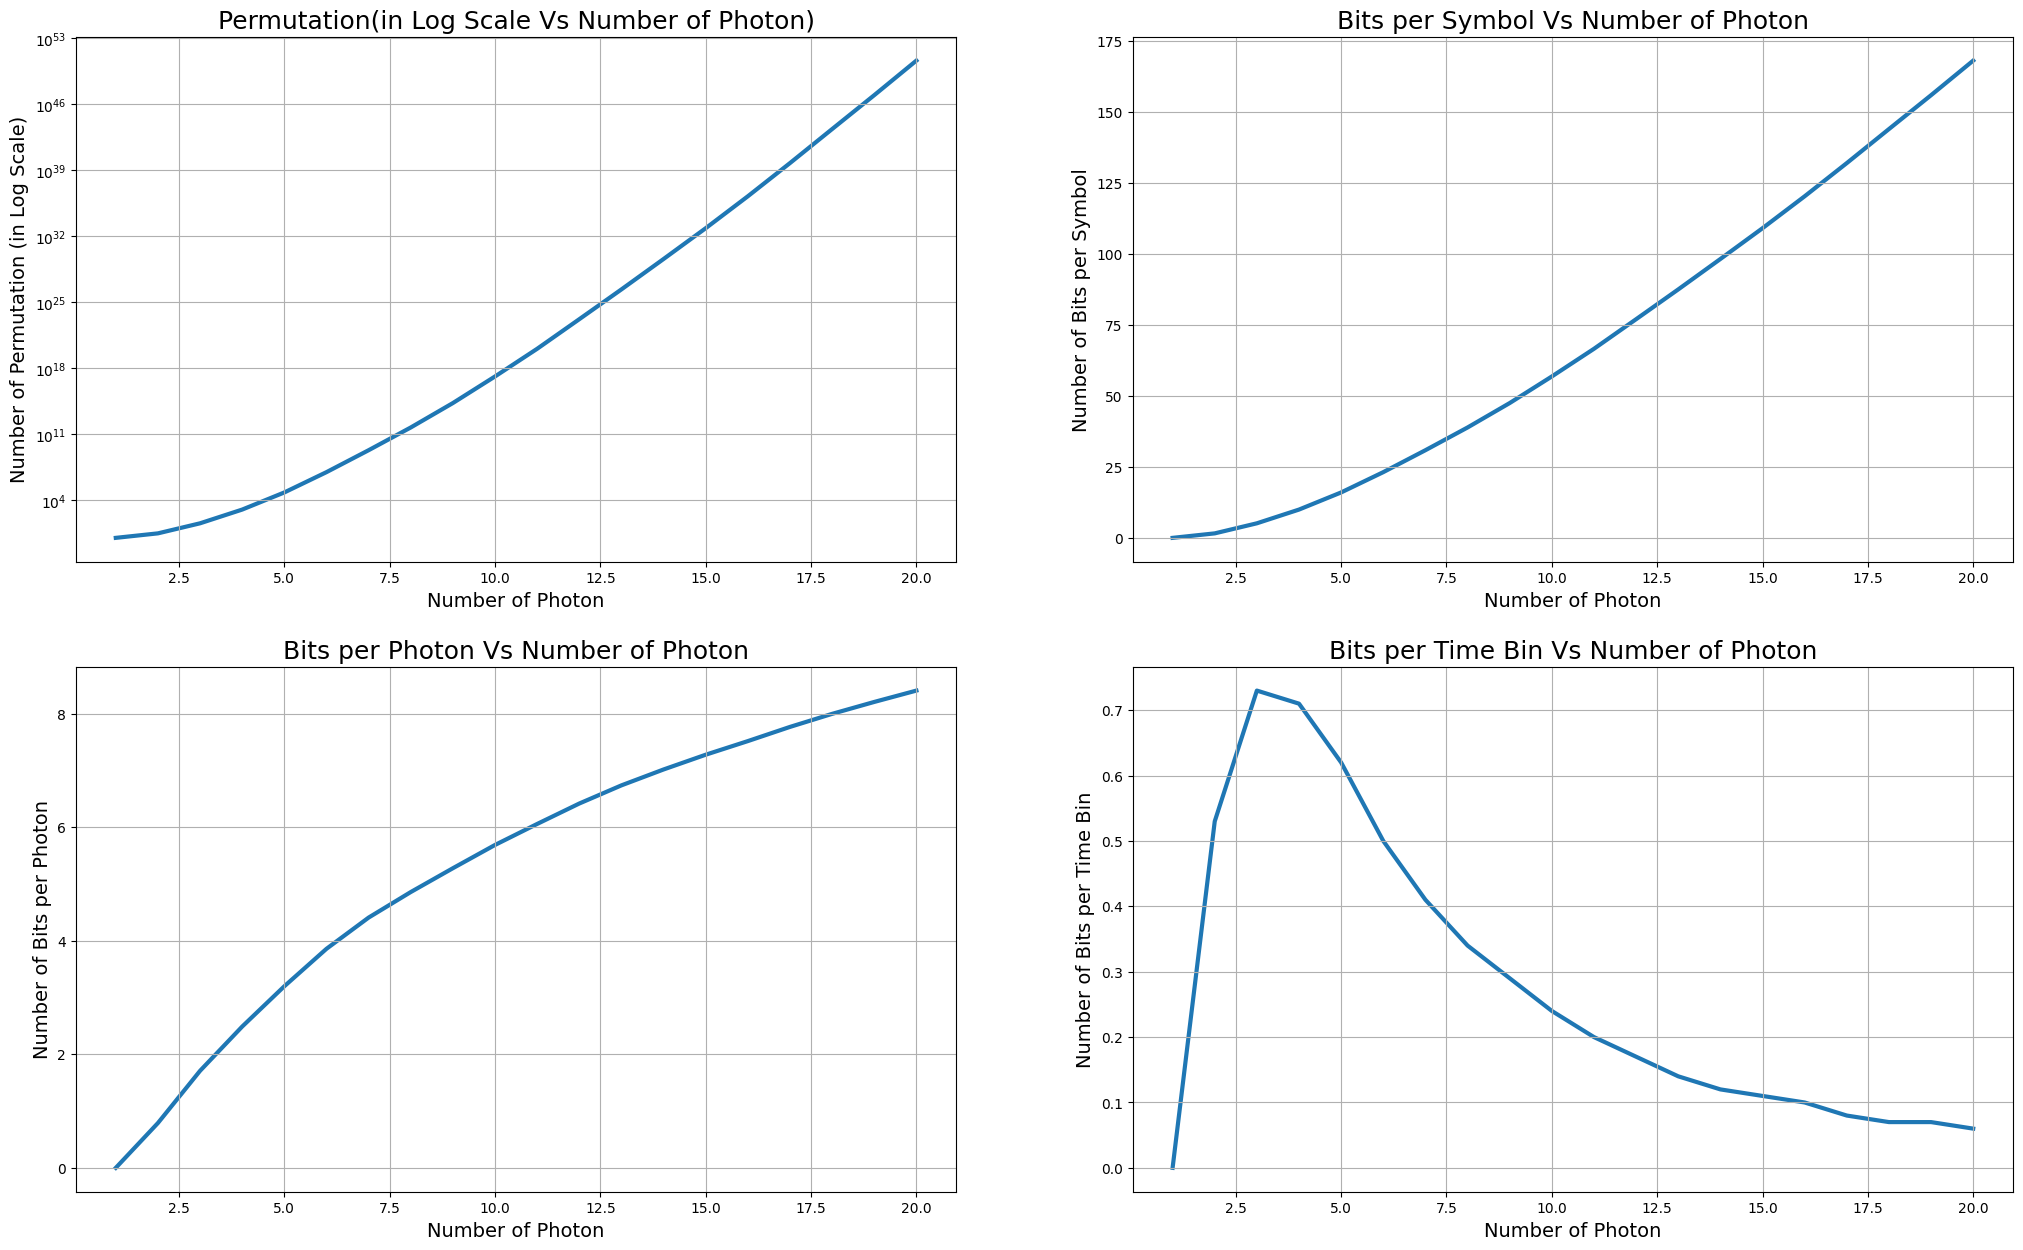

In [80]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_General_c[df_General_c.columns[0]],df_General_c[df_General_c.columns[2]],linewidth=3,zorder=1, label = "bits")
axis[0, 0].set_title('Permutation(in Log Scale Vs Number of Photon)', fontsize = 18)
axis[0, 0].set_xlabel('Number of Photon', fontsize = 14)
axis[0, 0].set_ylabel('Number of Permutation (in Log Scale)', fontsize = 14)
axis[0, 0].set_yscale('log')
#axis[0, 0].set_yscale('log')
#axis[0, 0].set_xlim([0, 21])
axis[0, 0].grid(True)

axis[0, 1].plot(df_General_c[df_General_c.columns[0]],df_General_c[df_General_c.columns[3]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Bits per Symbol Vs Number of Photon', fontsize = 18)
axis[0, 1].set_xlabel('Number of Photon', fontsize = 14)
axis[0, 1].set_ylabel('Number of Bits per Symbol', fontsize = 14)
axis[0, 1].grid(True)

axis[1, 0].plot(df_General_c[df_General_c.columns[0]],df_General_c[df_General_c.columns[4]],linewidth=3,zorder=1, label = "bits")
axis[1, 0].set_title('Bits per Photon Vs Number of Photon', fontsize = 18)
axis[1, 0].set_xlabel('Number of Photon', fontsize = 14)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 14)
axis[1, 0].grid(True)

axis[1, 1].plot(df_General_c[df_General_c.columns[0]],df_General_c[df_General_c.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Bits per Time Bin Vs Number of Photon', fontsize = 18)
axis[1, 1].set_xlabel('Number of Photon', fontsize = 14)
axis[1, 1].set_ylabel('Number of Bits per Time Bin', fontsize = 14)
axis[1, 1].grid(True)

figure.set_facecolor("white")
#plt.xticks(x)
plt.savefig('protocol/General_c_Photon_Plot.png', dpi=450, bbox_inches='tight')
plt.show()

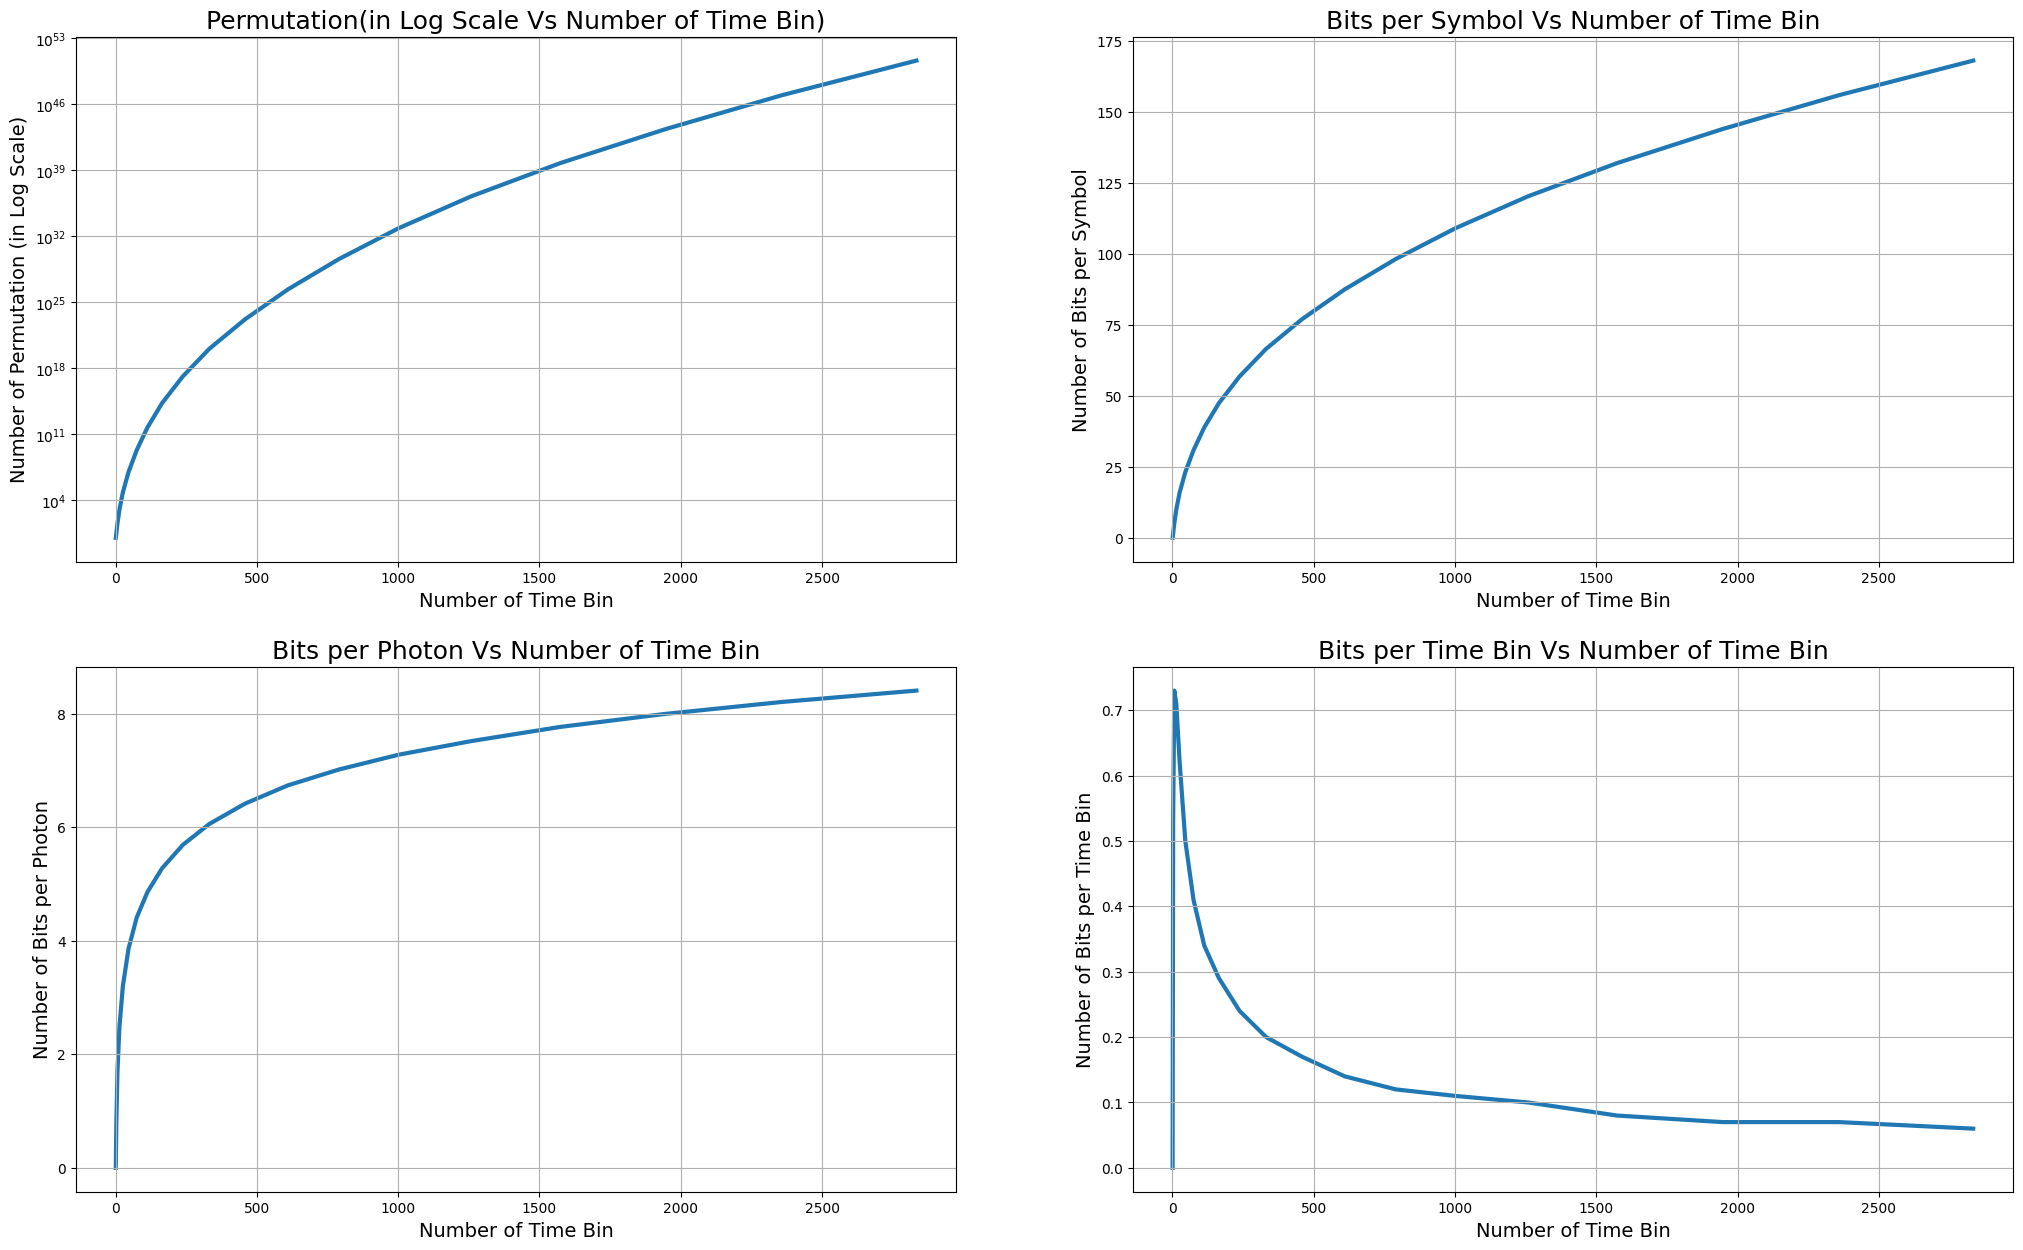

In [81]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_General_c[df_General_c.columns[1]],df_General_c[df_General_c.columns[2]],linewidth=3,zorder=1, label = "bits")
axis[0, 0].set_title('Permutation(in Log Scale Vs Number of Time Bin)', fontsize = 18)
axis[0, 0].set_xlabel('Number of Time Bin', fontsize = 14)
axis[0, 0].set_ylabel('Number of Permutation (in Log Scale)', fontsize = 14)
axis[0, 0].set_yscale('log')
#axis[0, 0].set_yscale('log')
#axis[0, 0].set_xlim([0, 21])
axis[0, 0].grid(True)

axis[0, 1].plot(df_General_c[df_General_c.columns[1]],df_General_c[df_General_c.columns[3]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Bits per Symbol Vs Number of Time Bin', fontsize = 18)
axis[0, 1].set_xlabel('Number of Time Bin', fontsize = 14)
axis[0, 1].set_ylabel('Number of Bits per Symbol', fontsize = 14)
axis[0, 1].grid(True)

axis[1, 0].plot(df_General_c[df_General_c.columns[1]],df_General_c[df_General_c.columns[4]],linewidth=3,zorder=1, label = "bits")
axis[1, 0].set_title('Bits per Photon Vs Number of Time Bin', fontsize = 18)
axis[1, 0].set_xlabel('Number of Time Bin', fontsize = 14)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 14)
axis[1, 0].grid(True)

axis[1, 1].plot(df_General_c[df_General_c.columns[1]],df_General_c[df_General_c.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Bits per Time Bin Vs Number of Time Bin', fontsize = 18)
axis[1, 1].set_xlabel('Number of Time Bin', fontsize = 14)
axis[1, 1].set_ylabel('Number of Bits per Time Bin', fontsize = 14)
axis[1, 1].grid(True)

figure.set_facecolor("white")
#plt.xticks(x)
plt.savefig('protocol/General_c_TIme_Plot.png', dpi=450, bbox_inches='tight')
plt.show()

### Permutation

In [82]:
# A Python program to print all permutations of given length 
from itertools import permutations 
  
# Get all permutations of length 2 
#perm = permutations([1, 2, 3], 2) 
  
# Print the obtained permutations 
#for i in list(perm): 
#    print (i) 

In [83]:
def permutation(n,r):
  return math.factorial(n)/math.factorial(n-r)

In [84]:
Generalnumber_p = []
GeneralPermutation_p = []
GeneralBPS_p = []
GeneralBPP_p = []
GeneralBPT_p = []


series = [1, 3, 7, 14, 26, 46, 75, 113, 165, 238, 332, 459, 610, 791, 1002, 1259, 1574, 1947, 2359, 2834, 3364, 3909, 4516, 5232, 6029, 6890, 7854, 8913, 10073, 11379, 12764, 14198, 15753, 17474, 19307, 21240]


df_General_p = pd.DataFrame(columns=['|Number of Photon|', 
                           'Time Bins|', 
                           'Permutation|', 
                           'Bits/Symbol|', 
                           'Bits/Photon|', 
                           'Bits/Time Bin|']
                  )

for n in range(1,11):
    Generalways_p = permutation(series[n-1],n)
    GeneralTimeBin = series[n-1]
    Generalbps_p = math.log2(Generalways_p)
    Generalbpp_p = math.log2(Generalways_p) / n
    Generalbpt_p = Generalbpp_p * n/series[n-1]
    
    GeneralTimeBin_SigFig_p = "{:.2e}".format(GeneralTimeBin)
    Generalways_SigFig_p = "{:.2e}".format(Generalways_p)
    Generalbps_round_p = round(Generalbps_p, 2)
    Generalbpp_round_p = round(Generalbpp_p, 2)
    Generalbpt_round_p = round(Generalbpt_p, 2)

    df_General_p.loc[len(df_General_p)] = [n, GeneralTimeBin_SigFig_p, Generalways_SigFig_p, Generalbps_round_p , Generalbpp_round_p, Generalbpt_round_p]


    #round(answer, 2)


In [85]:
df_General_p # the 4 data is not correct

,|Number of Photon|,Time Bins|,Permutation|,Bits/Symbol|,Bits/Photon|,Bits/Time Bin|
0,1,1.00e+00,1.00e+00,0.00,0.00,0.00
1,2,3.00e+00,6.00e+00,2.58,1.29,0.86
2,3,7.00e+00,2.10e+02,7.71,2.57,1.10
3,4,1.40e+01,2.40e+04,14.55,3.64,1.04
4,5,2.60e+01,7.89e+06,22.91,4.58,0.88
5,6,4.60e+01,6.74e+09,32.65,5.44,0.71
6,7,7.50e+01,1.00e+13,43.19,6.17,0.58
7,8,1.13e+02,2.06e+16,54.20,6.77,0.48
8,9,1.65e+02,7.26e+19,65.98,7.33,0.40
9,10,2.38e+02,4.81e+23,78.67,7.87,0.33


In [86]:
dfi.export(
    df_General_p,
    "protocol/General_p_Table.png",
    table_conversion="matplotlib"
)

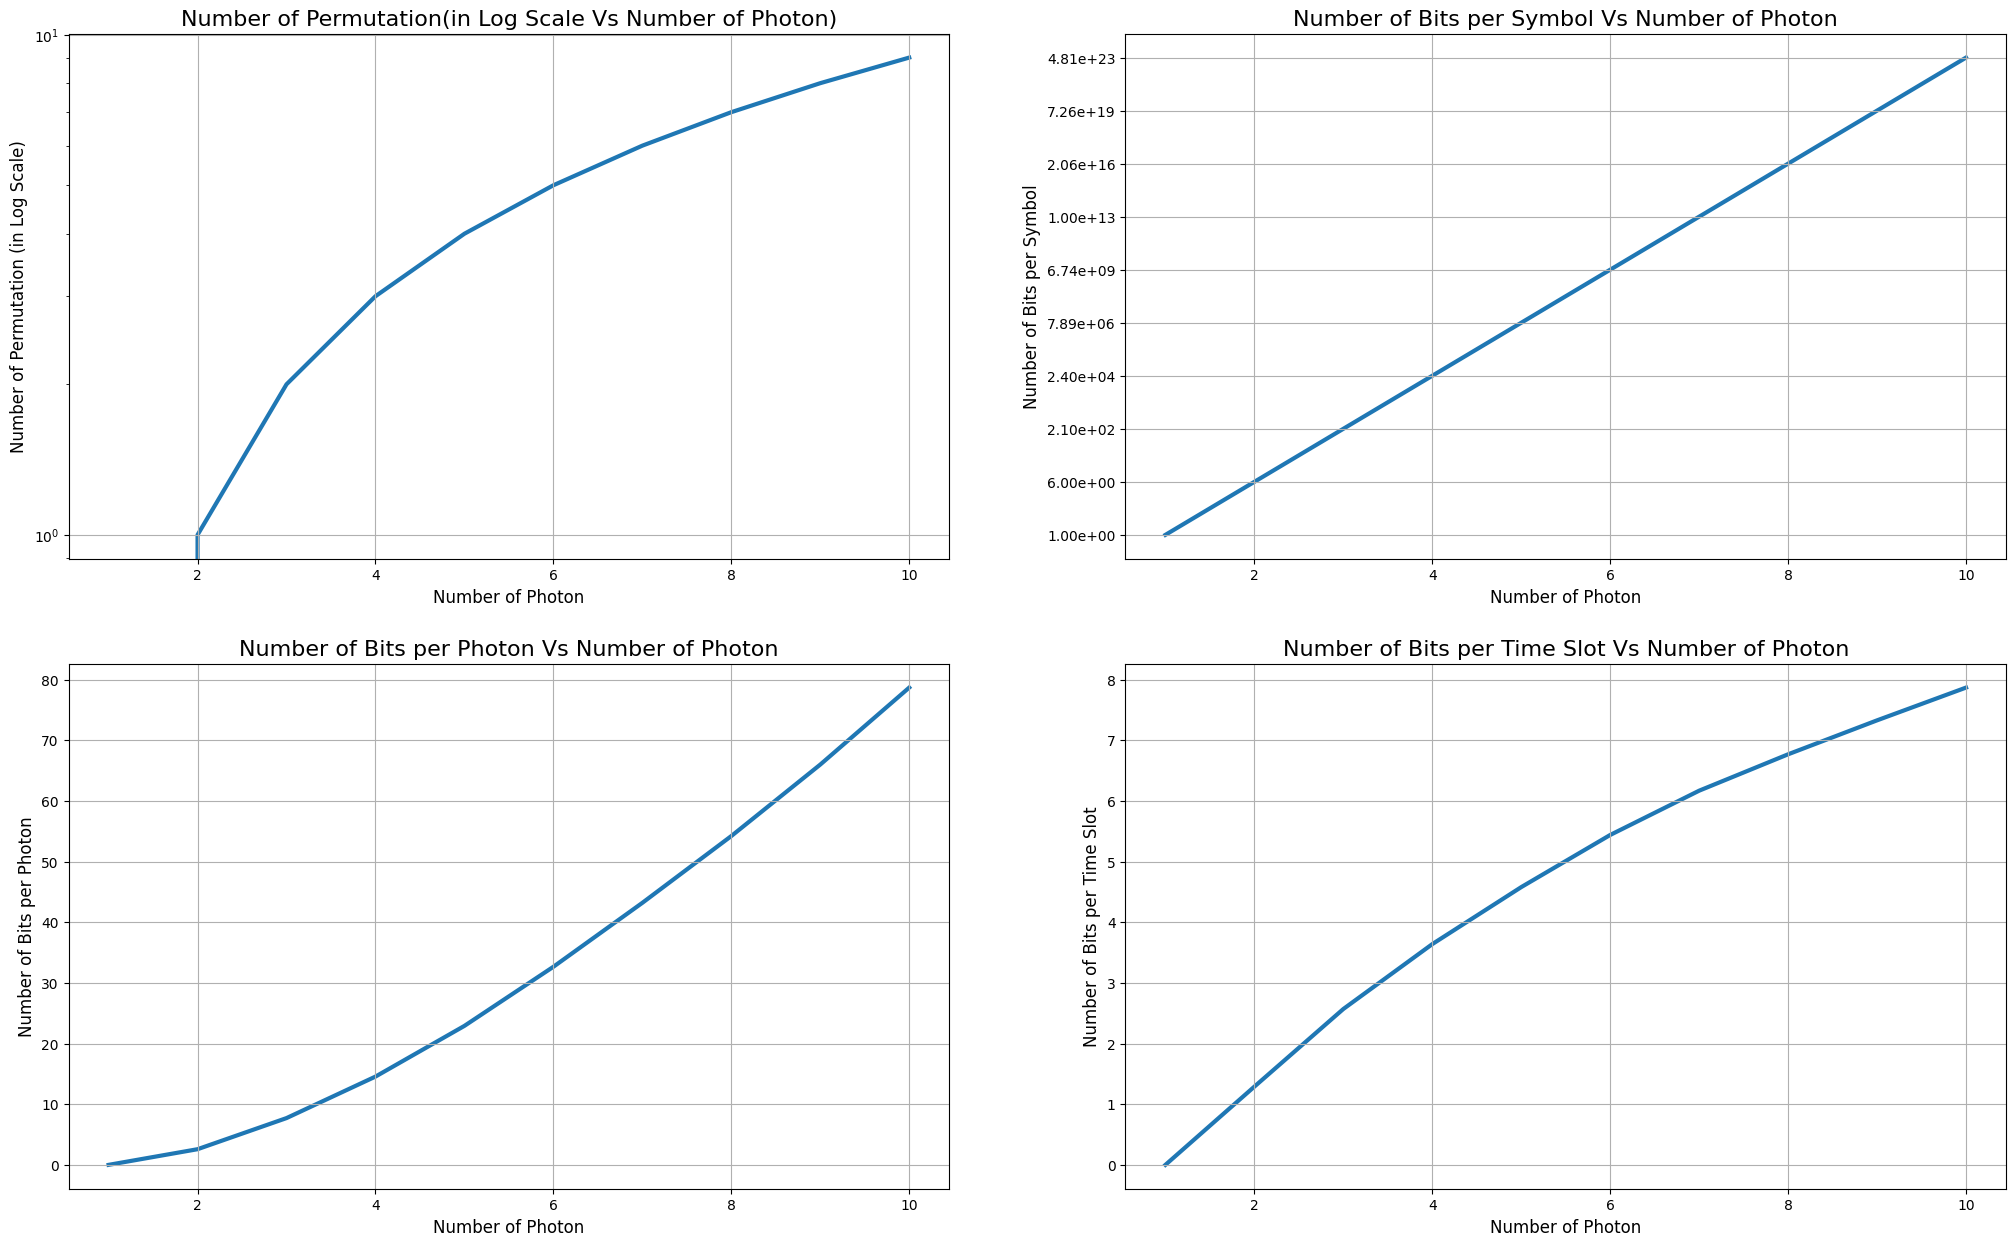

In [87]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_General_p[df_General_p.columns[0]],df_General_p[df_General_p.columns[1]],linewidth=3,zorder=1, label = "bits")
axis[0, 0].set_title('Number of Permutation(in Log Scale Vs Number of Photon)', fontsize = 16)
axis[0, 0].set_xlabel('Number of Photon', fontsize = 12)
axis[0, 0].set_ylabel('Number of Permutation (in Log Scale)', fontsize = 12)
axis[0, 0].set_yscale('log')
#axis[0, 0].set_yscale('log')
#axis[0, 0].set_xlim([0, 21])
axis[0, 0].grid(True)

axis[0, 1].plot(df_General_p[df_General_p.columns[0]],df_General_p[df_General_p.columns[2]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Number of Bits per Symbol Vs Number of Photon', fontsize = 16)
axis[0, 1].set_xlabel('Number of Photon', fontsize = 12)
axis[0, 1].set_ylabel('Number of Bits per Symbol', fontsize = 12)
axis[0, 1].grid(True)

axis[1, 0].plot(df_General_p[df_General_p.columns[0]],df_General_p[df_General_p.columns[3]],linewidth=3,zorder=1, label = "bits")
axis[1, 0].set_title('Number of Bits per Photon Vs Number of Photon', fontsize = 16)
axis[1, 0].set_xlabel('Number of Photon', fontsize = 12)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 12)
axis[1, 0].grid(True)

axis[1, 1].plot(df_General_p[df_General_p.columns[0]],df_General_p[df_General_p.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Number of Bits per Time Slot Vs Number of Photon', fontsize = 16)
axis[1, 1].set_xlabel('Number of Photon', fontsize = 12)
axis[1, 1].set_ylabel('Number of Bits per Time Slot', fontsize = 12)
axis[1, 1].grid(True)

figure.set_facecolor("white")
plt.savefig('protocol/General_p_Plot.png', dpi=450, bbox_inches='tight')
plt.show()


# PPM

We have 1 photon
<br>
14 timeslots
<br>
14 ways to order them

C1. Compare with PPM method using same number of slots, n. It will only use k=1 photons per symbol \\

C2. The number of symbols m in PPM will be the number ow ways 1 photon can be placed in n bins, i.e. m=n \\

C3. The number of bits (the information content per symbol) will be b=log2(m) \\



In [88]:
# PPMnumber = []
# PPMPermutation = []
# PPMBPS = []
# PPMBPP = []
# PPMBPT = []

# series = [1, 3, 7, 14, 26, 46, 75, 113, 165, 238, 332, 459, 610, 791, 1002, 1259, 1574, 1947, 2359, 2834, 3364, 3909, 4516, 5232, 6029, 6890, 7854, 8913, 10073, 11379, 12764, 14198, 15753, 17474, 19307, 21240]


# df_PPM = pd.DataFrame(columns=['|Number of Photon|',
#                            'Time Bins|',     
#                            'Permutation|', 
#                            'Bits/Symbol|', 
#                            'Bits/Photon|', 
#                            'Bits/Time Bin|']
#                   )

# for n in range(1,21):
#     PPMWays = series[n-1]
#     #PPMWays = n                       # C2 The number of symbols m in PPM will be the number ow ways 1 photon can be placed in n bins, i.e. m=n \\
#     PPMTimeBin = series[n-1]           # C1 Compare with PPM method using same number of slots, n. It will only use k=1 photons per symbol \\
#     PPMbps = math.log2(PPMTimeBin)        # C3 The number of bits (the information content per symbol) will be b=log2(m) 
#     PPMbpp = math.log2(PPMTimeBin) / 1    # C1 Compare with PPM method using same number of slots, n. It will only use k=1 photons per symbol \\
#     PPMbpt = PPMbpp * 1/series[n-1]

#     PPMTimeBin_SigFig = "{:.2e}".format(PPMTimeBin)
#     #PPMways_SigFig = "{:.2e}".format(PPMWays)
#     PPMWays_SigFig = PPMWays
#     PPMbps_round = round(PPMbps, 2)
#     PPMbpp_round = round(PPMbpp, 2)
#     PPMbpt_round = round(PPMbpt, 2)

#     df_PPM.loc[len(df_PPM)] = [1, PPMTimeBin, PPMWays_SigFig, PPMbps_round , PPMbpp_round, PPMbpt_round]    

  
#     #round(answer, 2)

df_PPM = pd.DataFrame(columns=['Number of Photon', 'Time Bins',  'Permutation',    'Bits/Symbol',  'Bits/Photon',  'Bits/Time Bin']
                      )

for n in range(1, 21):
    PPMWays = series[n - 1]
    PPMTimeBin = series[n - 1]
    PPMbps = math.log2(PPMTimeBin)
    PPMbpp = math.log2(PPMTimeBin) / 1
    PPMbpt = PPMbpp * 1 / series[n - 1]

    PPMTimeBin_SigFig = "{:.2e}".format(PPMTimeBin)
    PPMWays_SigFig = PPMWays
    PPMbps_round = round(PPMbps, 2)
    PPMbpp_round = round(PPMbpp, 2)
    PPMbpt_round = round(PPMbpt, 2)

    df_PPM.loc[len(df_PPM) + 1] = [1, PPMTimeBin, PPMWays_SigFig, PPMbps_round , PPMbpp_round, PPMbpt_round]


In [89]:
 df_PPM.style # the 4th data is not correct

,Number of Photon,Time Bins,Permutation,Bits/Symbol,Bits/Photon,Bits/Time Bin
1,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
2,1.000000,3.000000,3.000000,1.580000,1.580000,0.530000
3,1.000000,7.000000,7.000000,2.810000,2.810000,0.400000
4,1.000000,14.000000,14.000000,3.810000,3.810000,0.270000
5,1.000000,26.000000,26.000000,4.700000,4.700000,0.180000
6,1.000000,46.000000,46.000000,5.520000,5.520000,0.120000
7,1.000000,75.000000,75.000000,6.230000,6.230000,0.080000
8,1.000000,113.000000,113.000000,6.820000,6.820000,0.060000
9,1.000000,165.000000,165.000000,7.370000,7.370000,0.040000
10,1.000000,238.000000,238.000000,7.890000,7.890000,0.030000


In [90]:
math.log2(15)

3.9068905956085187

In [91]:
df_PPM.columns[0]

'Number of Photon'

In [92]:
dfi.export(
    df_PPM,
    "protocol/PPM_Table.png",
    table_conversion="matplotlib"
)

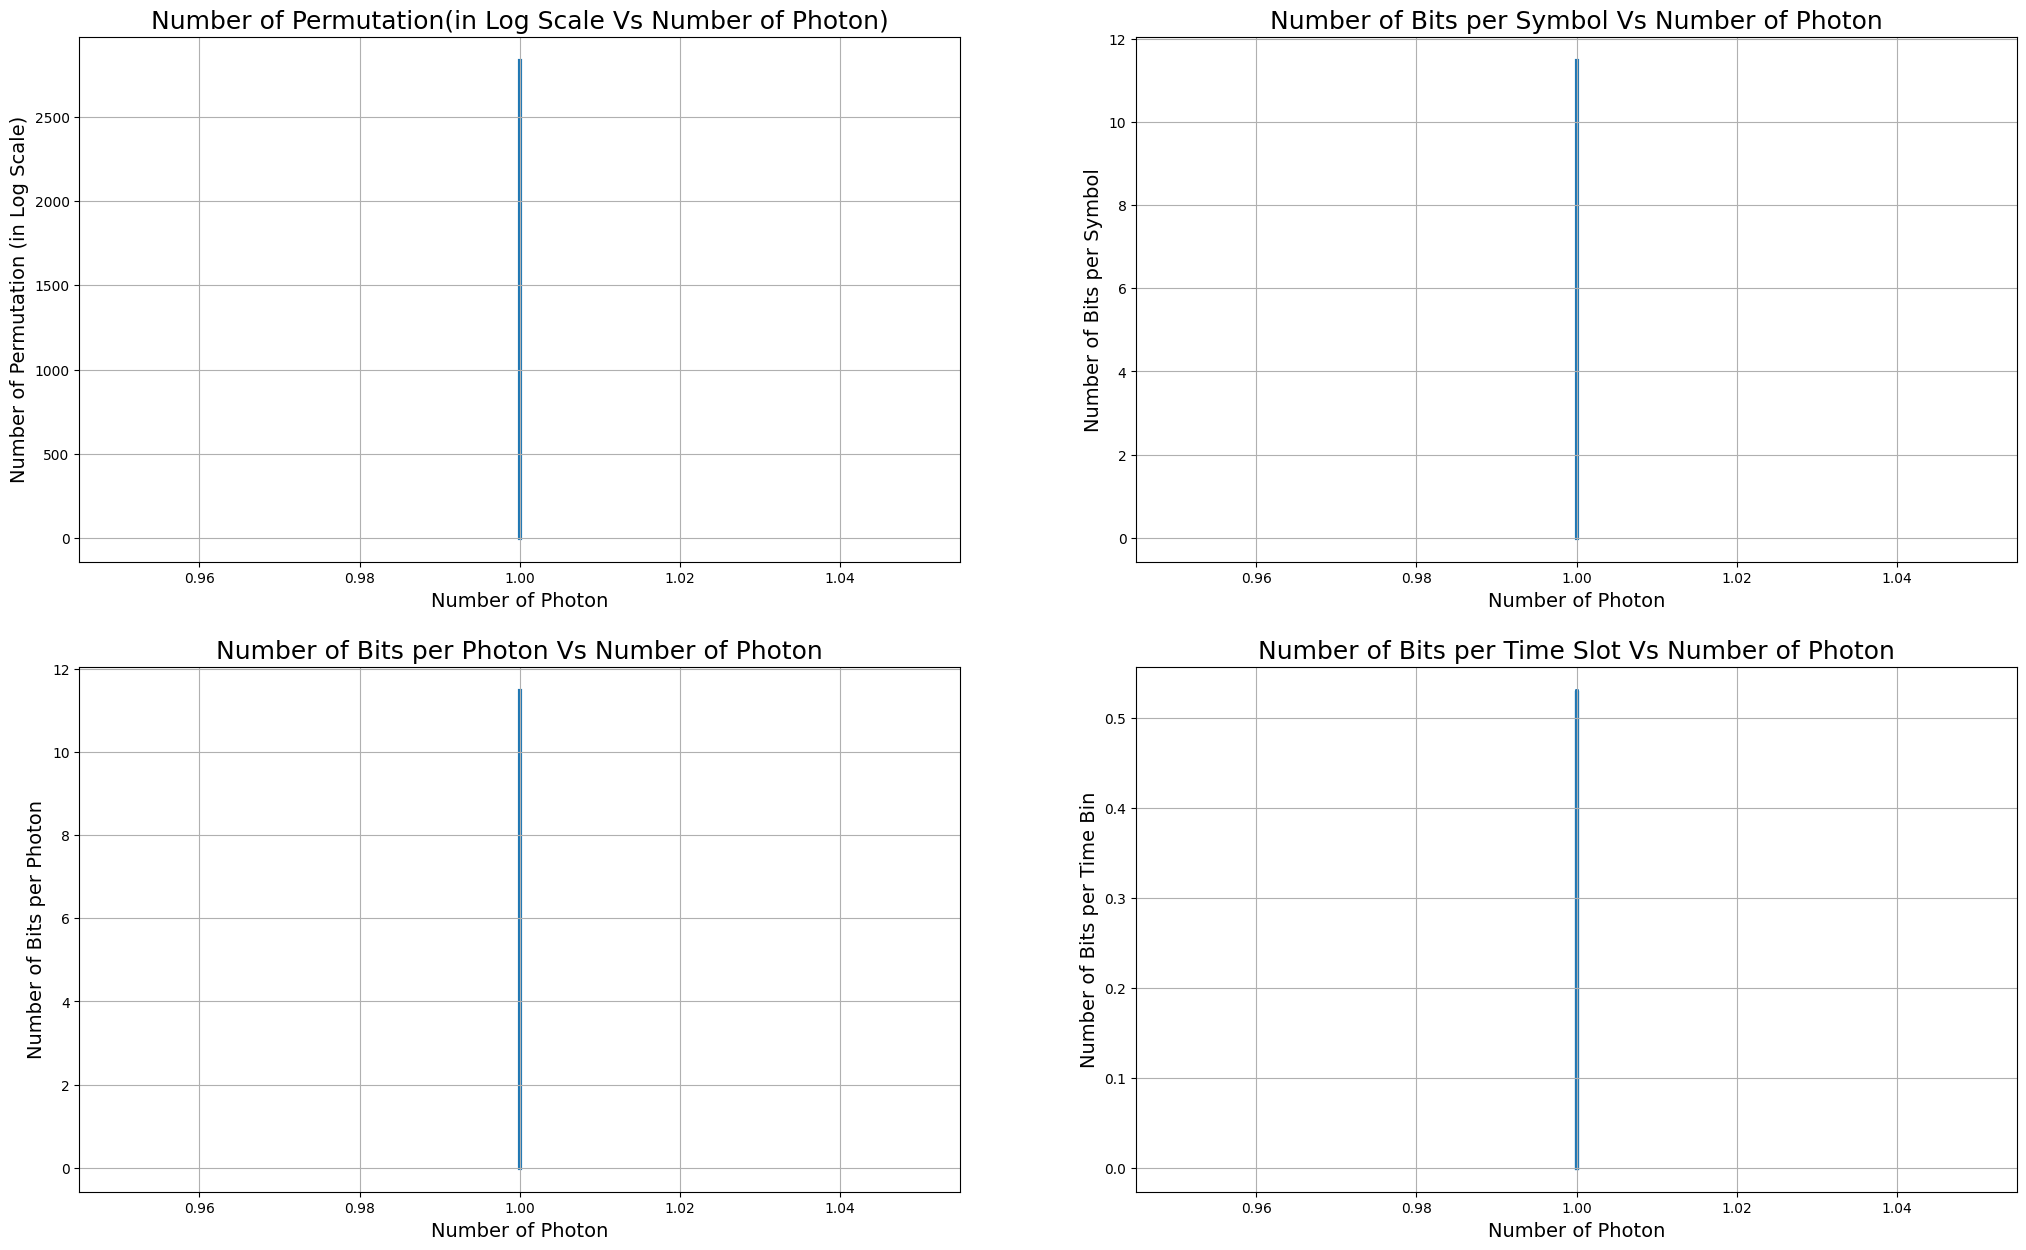

In [93]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_PPM[df_PPM.columns[0]],df_PPM[df_PPM.columns[2]],linewidth=3,zorder=1, label = "bits")
axis[0, 0].set_title('Number of Permutation(in Log Scale Vs Number of Photon)', fontsize = 18)
axis[0, 0].set_xlabel('Number of Photon', fontsize = 14)
axis[0, 0].set_ylabel('Number of Permutation (in Log Scale)', fontsize = 14)
#axis[0, 0].set_yscale('log')
#axis[0, 0].set_xlim([0, 21])
axis[0, 0].grid(True)

axis[0, 1].plot(df_PPM[df_PPM.columns[0]],df_PPM[df_PPM.columns[3]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Number of Bits per Symbol Vs Number of Photon', fontsize = 18)
axis[0, 1].set_xlabel('Number of Photon', fontsize = 14)
axis[0, 1].set_ylabel('Number of Bits per Symbol', fontsize = 14)
axis[0, 1].grid(True)

axis[1, 0].plot(df_PPM[df_PPM.columns[0]],df_PPM[df_PPM.columns[4]],linewidth=3,zorder=1, label = "bits")
axis[1, 0].set_title('Number of Bits per Photon Vs Number of Photon', fontsize = 18)
axis[1, 0].set_xlabel('Number of Photon', fontsize = 14)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 14)
axis[1, 0].grid(True)

axis[1, 1].plot(df_PPM[df_PPM.columns[0]],df_PPM[df_PPM.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Number of Bits per Time Slot Vs Number of Photon', fontsize = 18)
axis[1, 1].set_xlabel('Number of Photon', fontsize = 14)
axis[1, 1].set_ylabel('Number of Bits per Time Bin', fontsize = 14)
axis[1, 1].grid(True)

figure.set_facecolor("white")
plt.savefig('protocol/PPM_Photon_Plot.png', dpi=450, bbox_inches='tight')
plt.show()


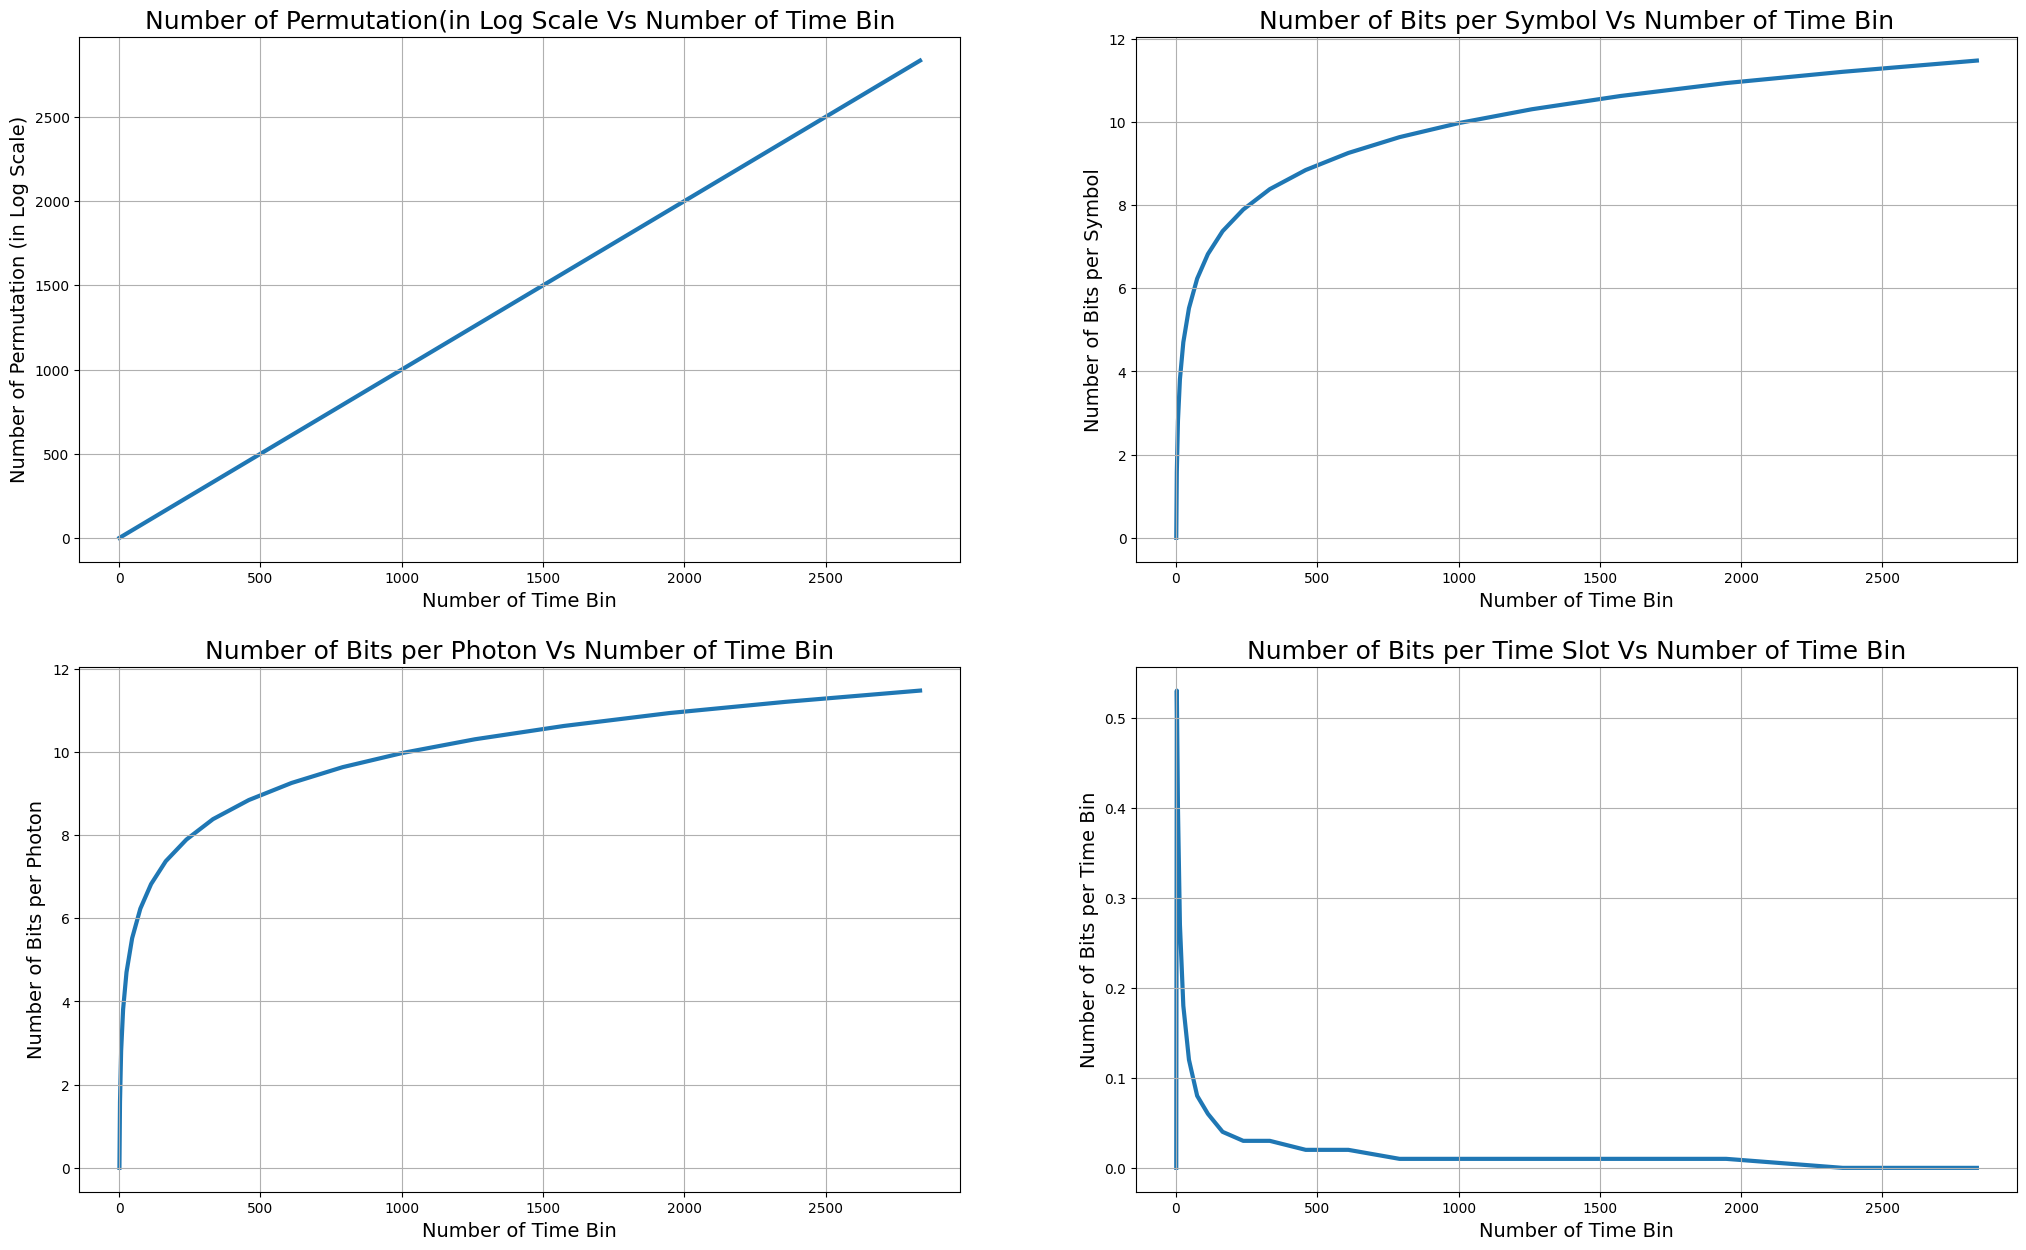

In [94]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_PPM[df_PPM.columns[1]],df_PPM[df_PPM.columns[2]],linewidth=3,zorder=1, label = "bits")
axis[0, 0].set_title('Number of Permutation(in Log Scale Vs Number of Time Bin', fontsize = 18)
axis[0, 0].set_xlabel('Number of Time Bin', fontsize = 14)
axis[0, 0].set_ylabel('Number of Permutation (in Log Scale)', fontsize = 14)
#axis[0, 0].set_yscale('log')
#axis[0, 0].set_xlim([0, 21])
axis[0, 0].grid(True)

axis[0, 1].plot(df_PPM[df_PPM.columns[1]],df_PPM[df_PPM.columns[3]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Number of Bits per Symbol Vs Number of Time Bin', fontsize = 18)
axis[0, 1].set_xlabel('Number of Time Bin', fontsize = 14)
axis[0, 1].set_ylabel('Number of Bits per Symbol', fontsize = 14)
axis[0, 1].grid(True)

axis[1, 0].plot(df_PPM[df_PPM.columns[1]],df_PPM[df_PPM.columns[4]],linewidth=3,zorder=1, label = "bits")
axis[1, 0].set_title('Number of Bits per Photon Vs Number of Time Bin', fontsize = 18)
axis[1, 0].set_xlabel('Number of Time Bin', fontsize = 14)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 14)
axis[1, 0].grid(True)

axis[1, 1].plot(df_PPM[df_PPM.columns[1]],df_PPM[df_PPM.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Number of Bits per Time Slot Vs Number of Time Bin', fontsize = 18)
axis[1, 1].set_xlabel('Number of Time Bin', fontsize = 14)
axis[1, 1].set_ylabel('Number of Bits per Time Bin', fontsize = 14)
axis[1, 1].grid(True)

figure.set_facecolor("white")
plt.savefig('protocol/PPM_TimeBin_Plot.png', dpi=450, bbox_inches='tight')
plt.show()


# OOK


D1. Compare with OOK method using same number of slots, n. It will in average use k=n/2 photons per symbol \\

D2. The number of symbols m in PPM will be m=2^n \\

D3. The number of bits (the information content per symbol) will be b=log2(m)=n \\

In [95]:
OOKnumber = []
OOKPermutation = []
OOKBPS = []
OOKBPP = []
OOKBPT = []

series = [1, 3, 7, 14, 26, 46, 75, 113, 165, 238, 332, 459, 610, 791, 1002, 1259, 1574, 1947, 2359, 2834, 3364, 3909, 4516, 5232, 6029, 6890, 7854, 8913, 10073, 11379, 12764, 14198, 15753, 17474, 19307, 21240]

df_OOK = pd.DataFrame(columns=['Number of Photon', 
                           'Time Bins',
                           'Permutation',  
                           'Bits/Symbol', 
                           'Bits/Photon', 
                           'Bits/Time Bin']
                  )

for n in range(1,21):
    #OOKways = (2)**series[n-1]
    OOKTimeBin = series[n-1]                           # D1. Compare with OOK method using same number of slots, n. It will in average use k=n/2 photons per symbol
    OOKWays = (2)**series[n-1]                         # D2. The number of symbols m in PPM will be m=2^n, n is the number of time bin
    OOKbps = math.log2(OOKWays)                        # D3. The number of bits (the information content per symbol) will be b=log2(m)=n, n is the number of time bin
    #OOKbpp = (math.log2(OOKWays) * series[n-1] / n
    OOKbpp = 2
    #OOKbpt = OOKbpp * n / series[n-1]
    OOKbpt = 1
    OOKTimeBin_SigFig = "{:.2e}".format(OOKTimeBin)
    # OOKWays_SigFig = "{:.2e}".format(OOKWays)
    OOKWays_SigFig = str(OOKWays)
    # OOKWays_SigFig = "{:.1e}".format(OOKWays)

    #OOKWays_SigFig = round(OOKWays, 2)
    OOKbps_round = round(OOKbps, 2)
    OOKbpp_round = round(OOKbpp, 2)
    OOKbpt_round = round(OOKbpt, 2)

    # df_OOK.loc[len(df_OOK)] = [OOKTimeBin/2, OOKTimeBin, OOKWays_SigFig, OOKbps_round, OOKbpp_round, OOKbpt] 
    df_OOK.loc[len(df_OOK)+1] = [OOKTimeBin/2, OOKTimeBin, str(OOKWays), OOKbps_round, OOKbpp_round, OOKbpt] 

In [96]:
#df_OOK.style

In [97]:
 df_OOK # not sure if it is correct

,Number of Photon,Time Bins,Permutation,Bits/Symbol,Bits/Photon,Bits/Time Bin
1,0.5,1,2,1.0,2,1
2,1.5,3,8,3.0,2,1
3,3.5,7,128,7.0,2,1
4,7.0,14,16384,14.0,2,1
5,13.0,26,67108864,26.0,2,1
6,23.0,46,70368744177664,46.0,2,1
7,37.5,75,37778931862957161709568,75.0,2,1
8,56.5,113,10384593717069655257060992658440192,113.0,2,1
9,82.5,165,4676805239458889338251791464692105662898984137...,165.0,2,1
10,119.0,238,4417117661945960823958243751857296289568709742...,238.0,2,1


In [98]:
dfi.export(
    df_OOK,
    "protocol/OOK_Table.png",
    table_conversion="matplotlib"
)

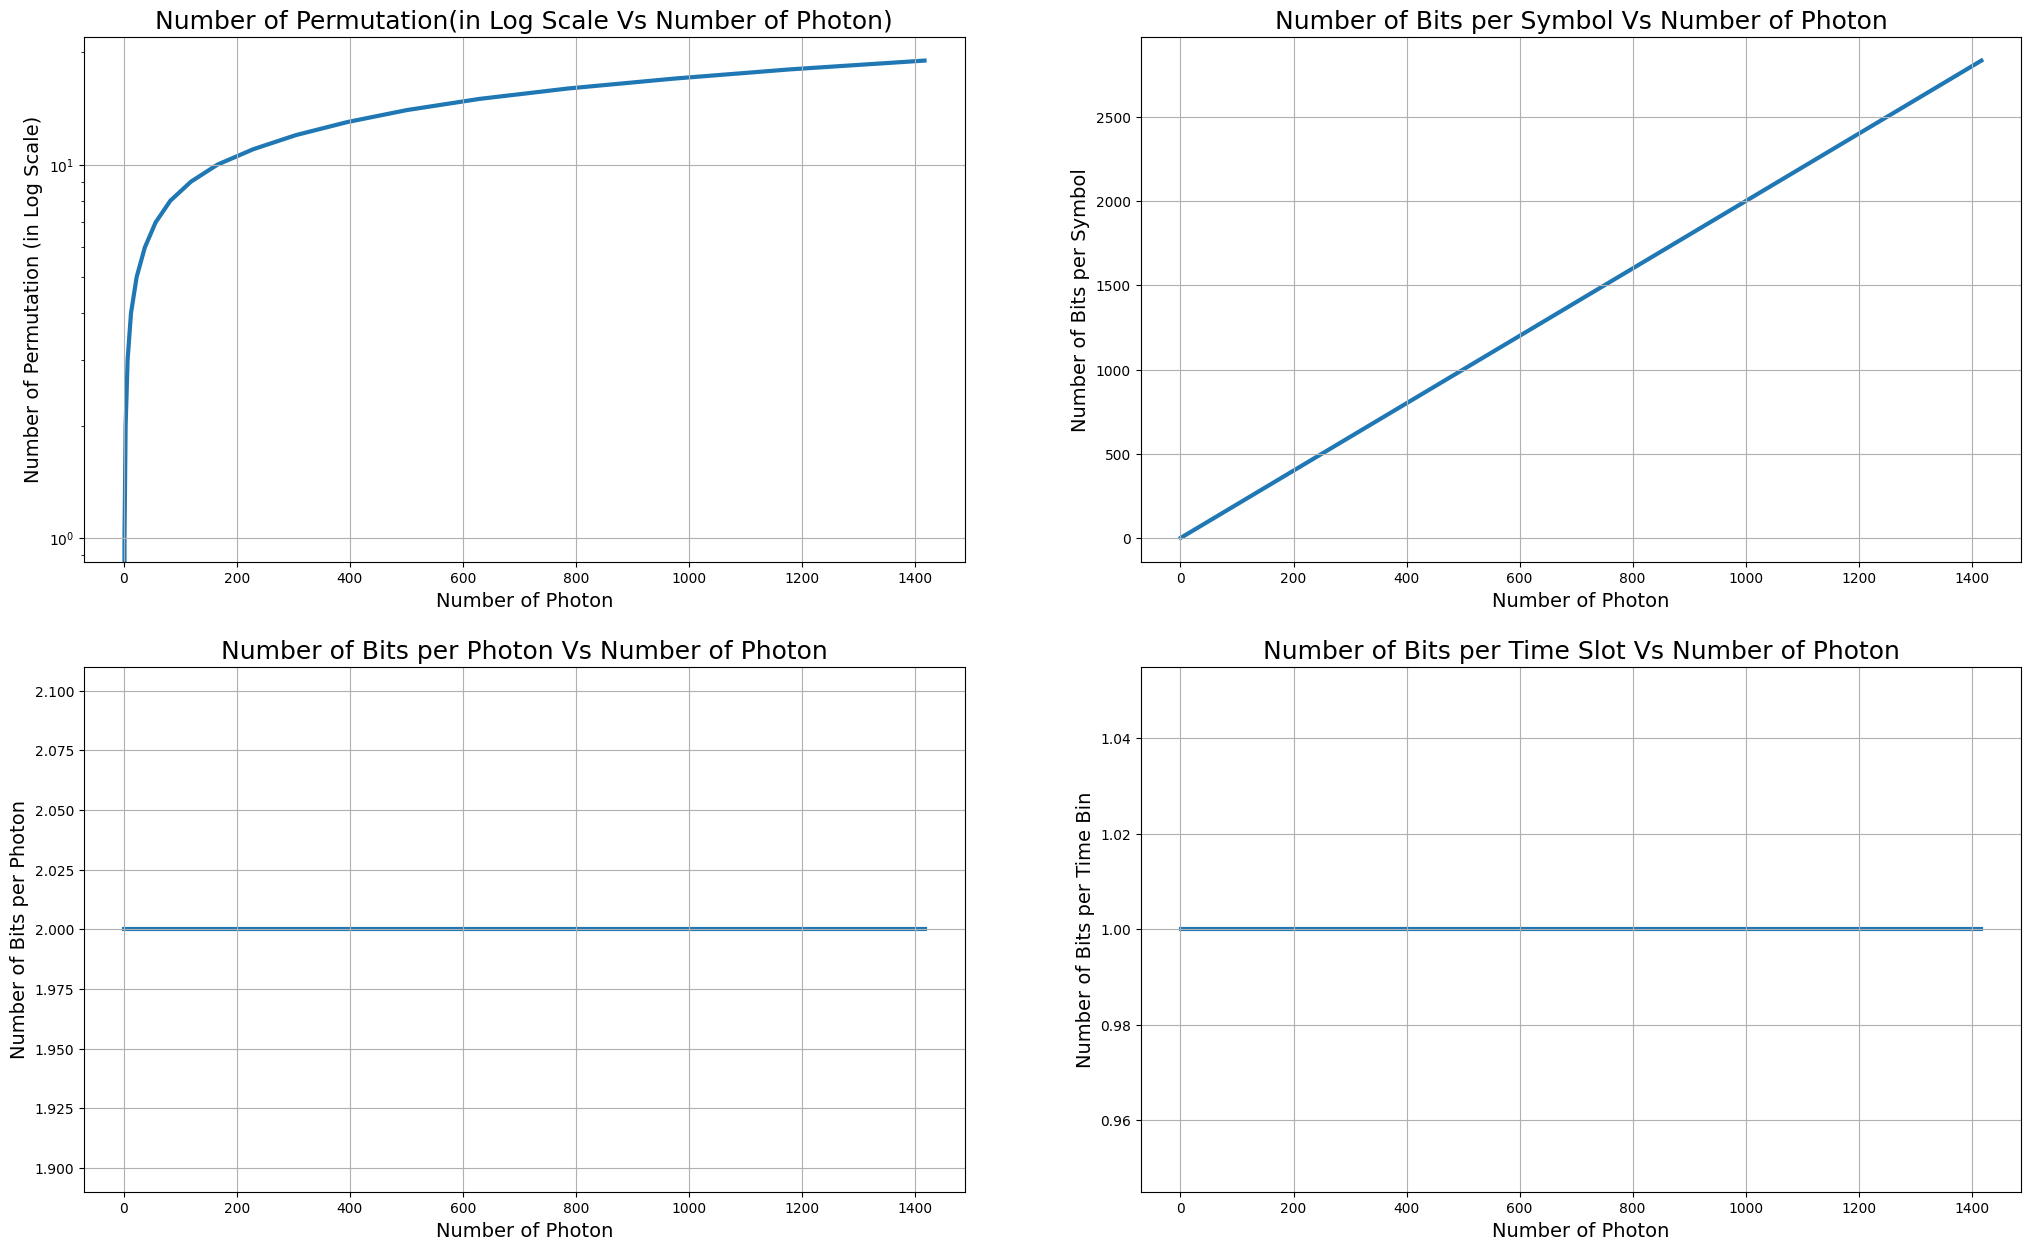

In [99]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_OOK[df_OOK.columns[0]],df_OOK[df_OOK.columns[2]],linewidth=3,zorder=1, label = "bits")

axis[0, 0].set_title('Number of Permutation(in Log Scale Vs Number of Photon)', fontsize = 18)
axis[0, 0].set_xlabel('Number of Photon', fontsize = 14)
axis[0, 0].set_ylabel('Number of Permutation (in Log Scale)', fontsize = 14)
axis[0, 0].set_yscale('log')
#axis[0, 0].set_yscale('log')
#axis[0, 0].set_xlim([0, 21])
axis[0, 0].grid(True)

axis[0, 1].plot(df_OOK[df_OOK.columns[0]],df_OOK[df_OOK.columns[3]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Number of Bits per Symbol Vs Number of Photon', fontsize = 18)
axis[0, 1].set_xlabel('Number of Photon', fontsize = 14)
axis[0, 1].set_ylabel('Number of Bits per Symbol', fontsize = 14)
axis[0, 1].grid(True)

axis[1, 0].plot(df_OOK[df_OOK.columns[0]],df_OOK[df_OOK.columns[4]],linewidth=3,zorder=1, label = "bits")
axis[1, 0].set_title('Number of Bits per Photon Vs Number of Photon', fontsize = 18)
axis[1, 0].set_xlabel('Number of Photon', fontsize = 14)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 14)
axis[1, 0].grid(True)

axis[1, 1].plot(df_OOK[df_OOK.columns[0]],df_OOK[df_OOK.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Number of Bits per Time Slot Vs Number of Photon', fontsize = 18)
axis[1, 1].set_xlabel('Number of Photon', fontsize = 14)
axis[1, 1].set_ylabel('Number of Bits per Time Bin', fontsize = 14)
axis[1, 1].grid(True)

figure.set_facecolor("white")
plt.savefig('protocol/OOK_Photon_Plot.png', dpi=450, bbox_inches='tight')
plt.show()

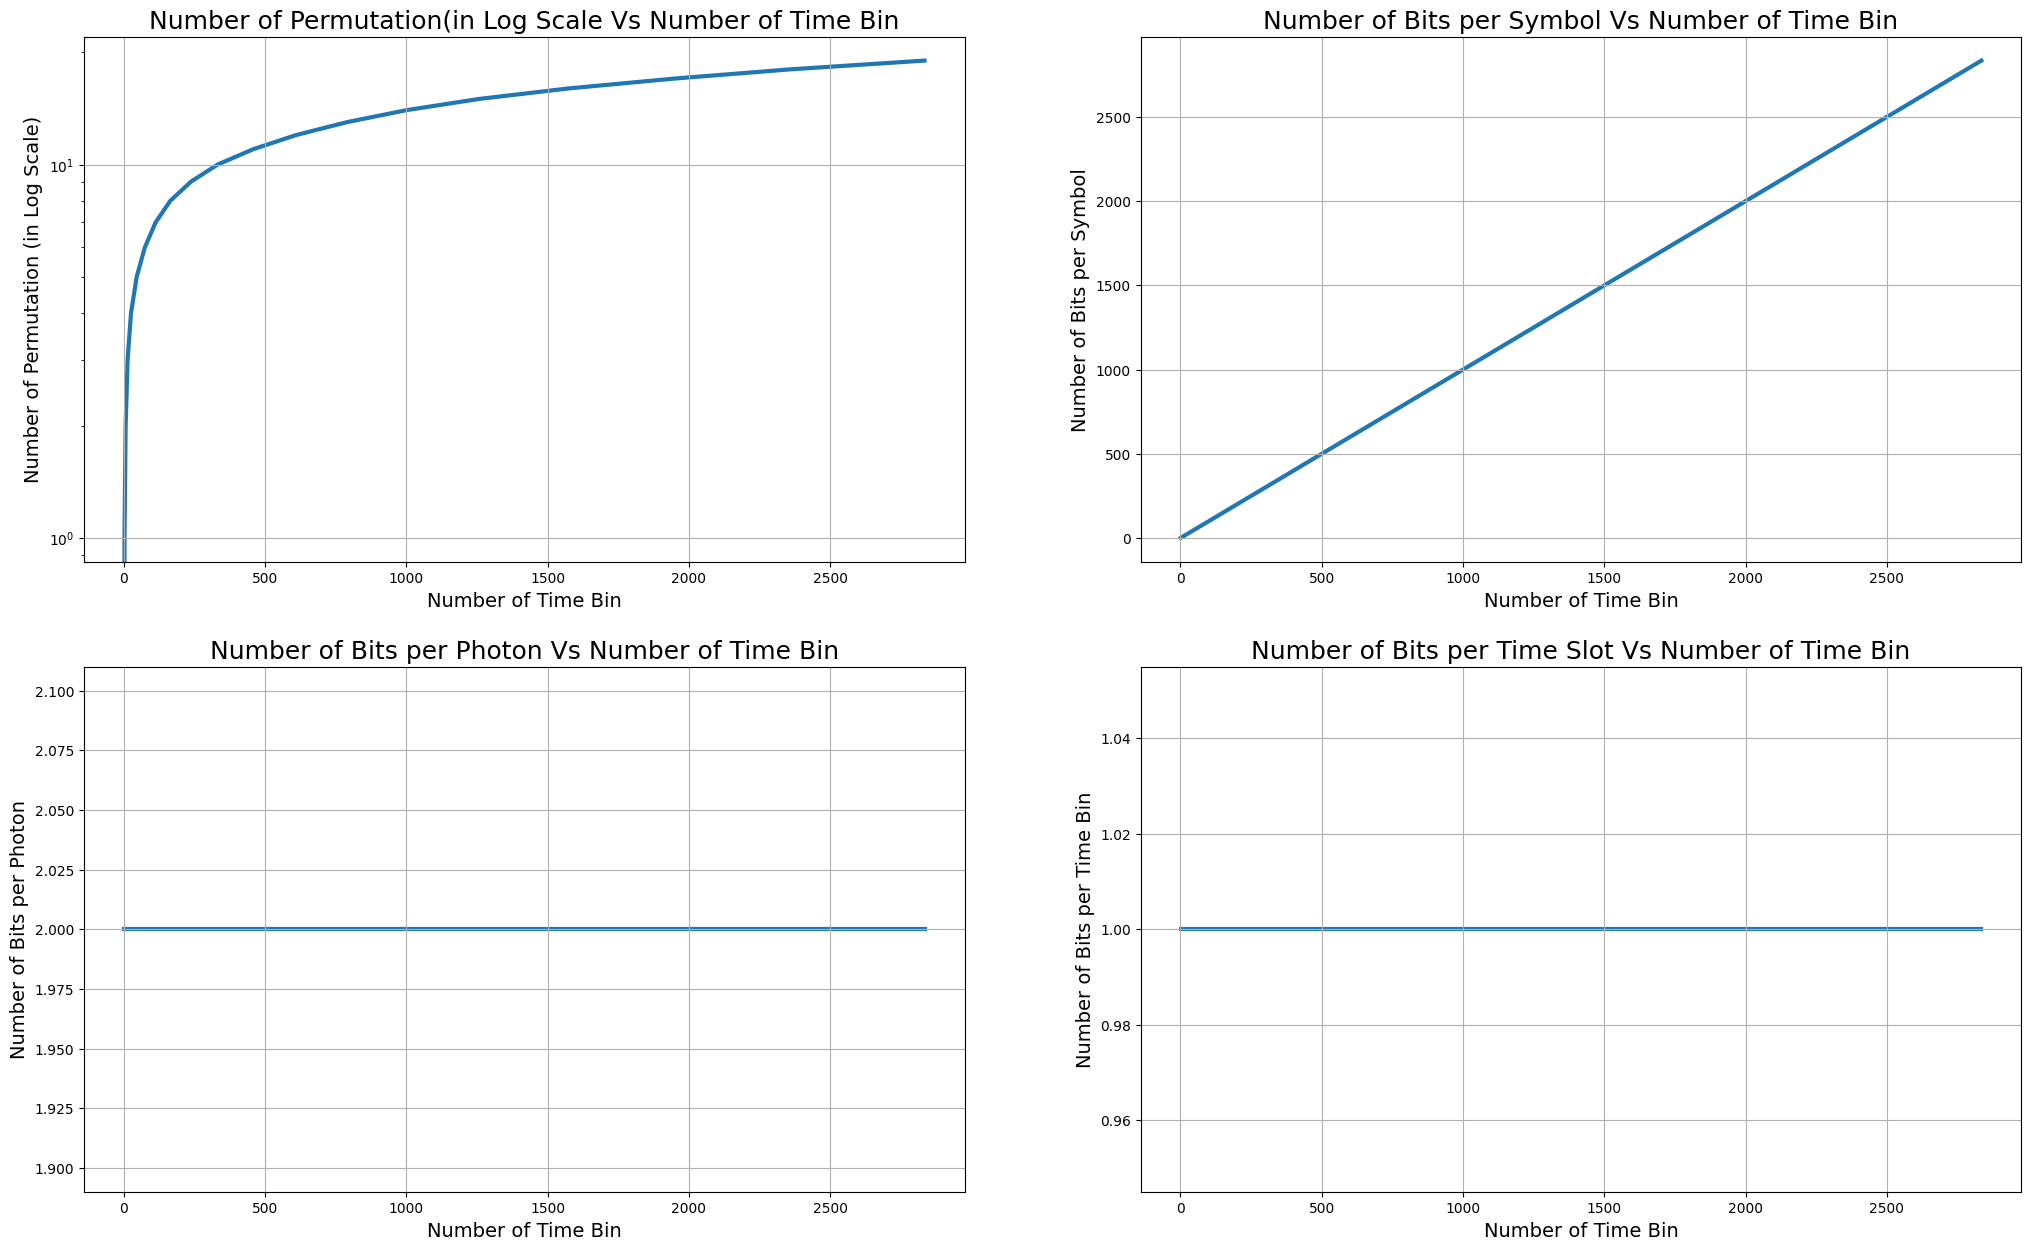

In [107]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_OOK[df_OOK.columns[1]],df_OOK[df_OOK.columns[2]],linewidth=3,zorder=1, label = "bits")

axis[0, 0].set_title('Number of Permutation(in Log Scale Vs Number of Time Bin', fontsize = 18)
axis[0, 0].set_xlabel('Number of Time Bin', fontsize = 14)
axis[0, 0].set_ylabel('Number of Permutation (in Log Scale)', fontsize = 14)
axis[0, 0].set_yscale('log')
#axis[0, 0].set_yscale('log')
#axis[0, 0].set_xlim([0, 21])
axis[0, 0].grid(True)

axis[0, 1].plot(df_OOK[df_OOK.columns[1]],df_OOK[df_OOK.columns[3]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Number of Bits per Symbol Vs Number of Time Bin', fontsize = 18)
axis[0, 1].set_xlabel('Number of Time Bin', fontsize = 14)
axis[0, 1].set_ylabel('Number of Bits per Symbol', fontsize = 14)
axis[0, 1].grid(True)

axis[1, 0].plot(df_OOK[df_OOK.columns[1]],df_OOK[df_OOK.columns[4]],linewidth=3,zorder=1, label = "bits")
axis[1, 0].set_title('Number of Bits per Photon Vs Number of Time Bin', fontsize = 18)
axis[1, 0].set_xlabel('Number of Time Bin', fontsize = 14)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 14)
axis[1, 0].grid(True)

axis[1, 1].plot(df_OOK[df_OOK.columns[1]],df_OOK[df_OOK.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Number of Bits per Time Slot Vs Number of Time Bin', fontsize = 18)
axis[1, 1].set_xlabel('Number of Time Bin', fontsize = 14)
axis[1, 1].set_ylabel('Number of Bits per Time Bin', fontsize = 14)
axis[1, 1].grid(True)

figure.set_facecolor("white")
plt.savefig('protocol/OOK_TimeBin_Plot.png', dpi=450, bbox_inches='tight')
plt.show()

##  Bits/Photon versus Photon over 4 Schemes

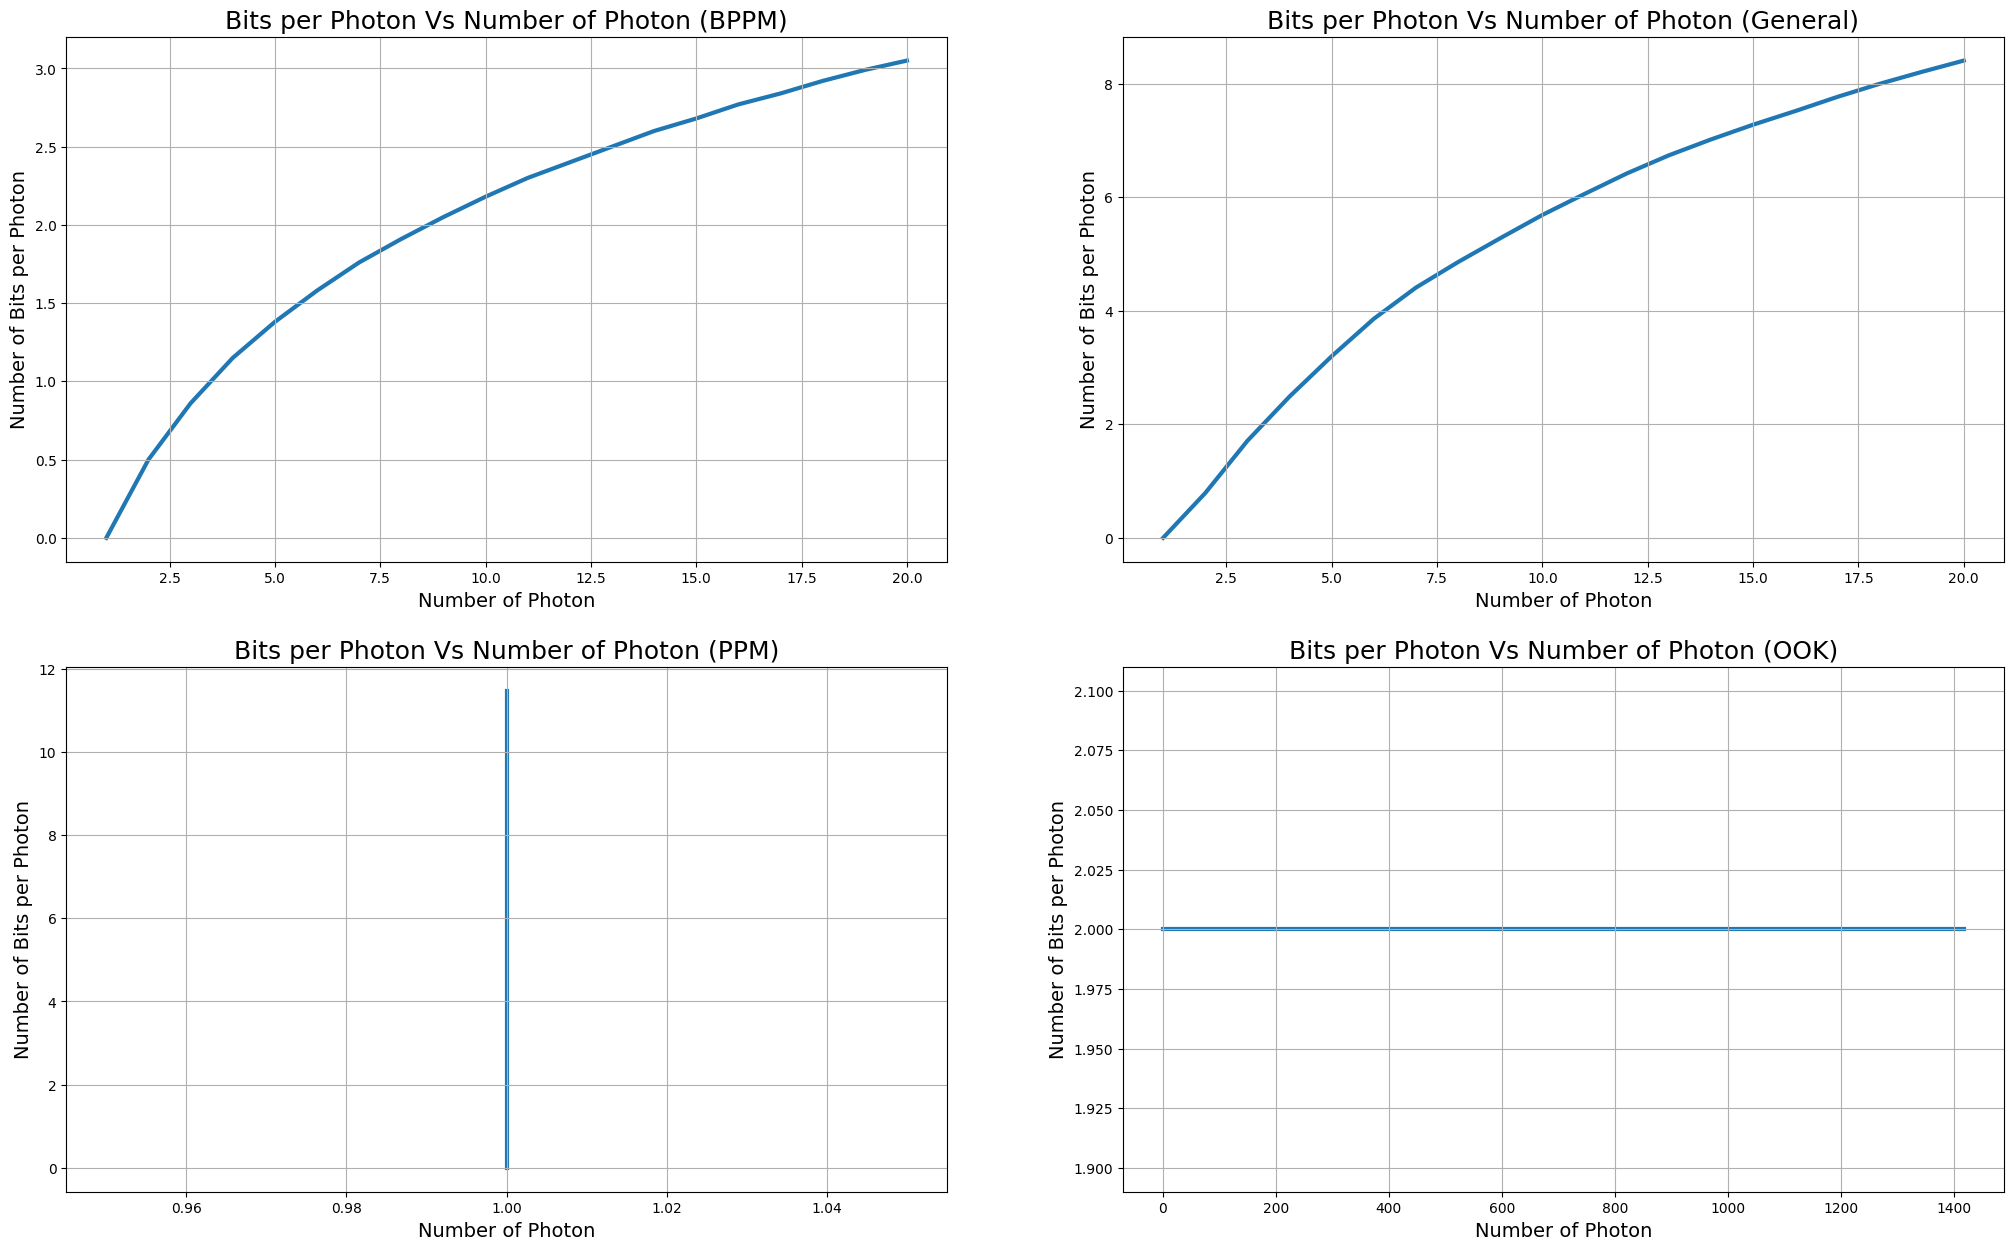

In [116]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_Jonas[df_Jonas.columns[0]],df_Jonas[df_Jonas.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[0, 0].set_title('Bits per Photon Vs Number of Photon (BPPM)' , fontsize = 18)
axis[0, 0].set_xlabel('Number of Photon', fontsize = 14)
axis[0, 0].set_ylabel('Number of Bits per Photon', fontsize = 14)
axis[0, 0].grid(True)

axis[0, 1].plot(df_General_c[df_General_c.columns[0]],df_General_c[df_General_c.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[0, 1].set_title('Bits per Photon Vs Number of Photon (General)' , fontsize = 18)
axis[0, 1].set_xlabel('Number of Photon', fontsize = 14)
axis[0, 1].set_ylabel('Number of Bits per Photon', fontsize = 14)
axis[0, 1].grid(True)

axis[1, 0].plot(df_PPM[df_PPM.columns[0]],df_PPM[df_PPM.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[1, 0].set_title('Bits per Photon Vs Number of Photon (PPM)' , fontsize = 18)
axis[1, 0].set_xlabel('Number of Photon', fontsize = 14)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 14)
axis[1, 0].grid(True)

axis[1, 1].plot(df_OOK[df_OOK.columns[0]],df_OOK[df_OOK.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Bits per Photon Vs Number of Photon (OOK)' , fontsize = 18)
axis[1, 1].set_xlabel('Number of Photon', fontsize = 14)
axis[1, 1].set_ylabel('Number of Bits per Photon', fontsize = 14)
axis[1, 1].grid(True)

figure.set_facecolor("white")
plt.savefig('protocol/4SchemesBPP_Photon.png', dpi=450, bbox_inches='tight')
plt.show()

## Bits/ Photon versus Time Bin over 4 protocols

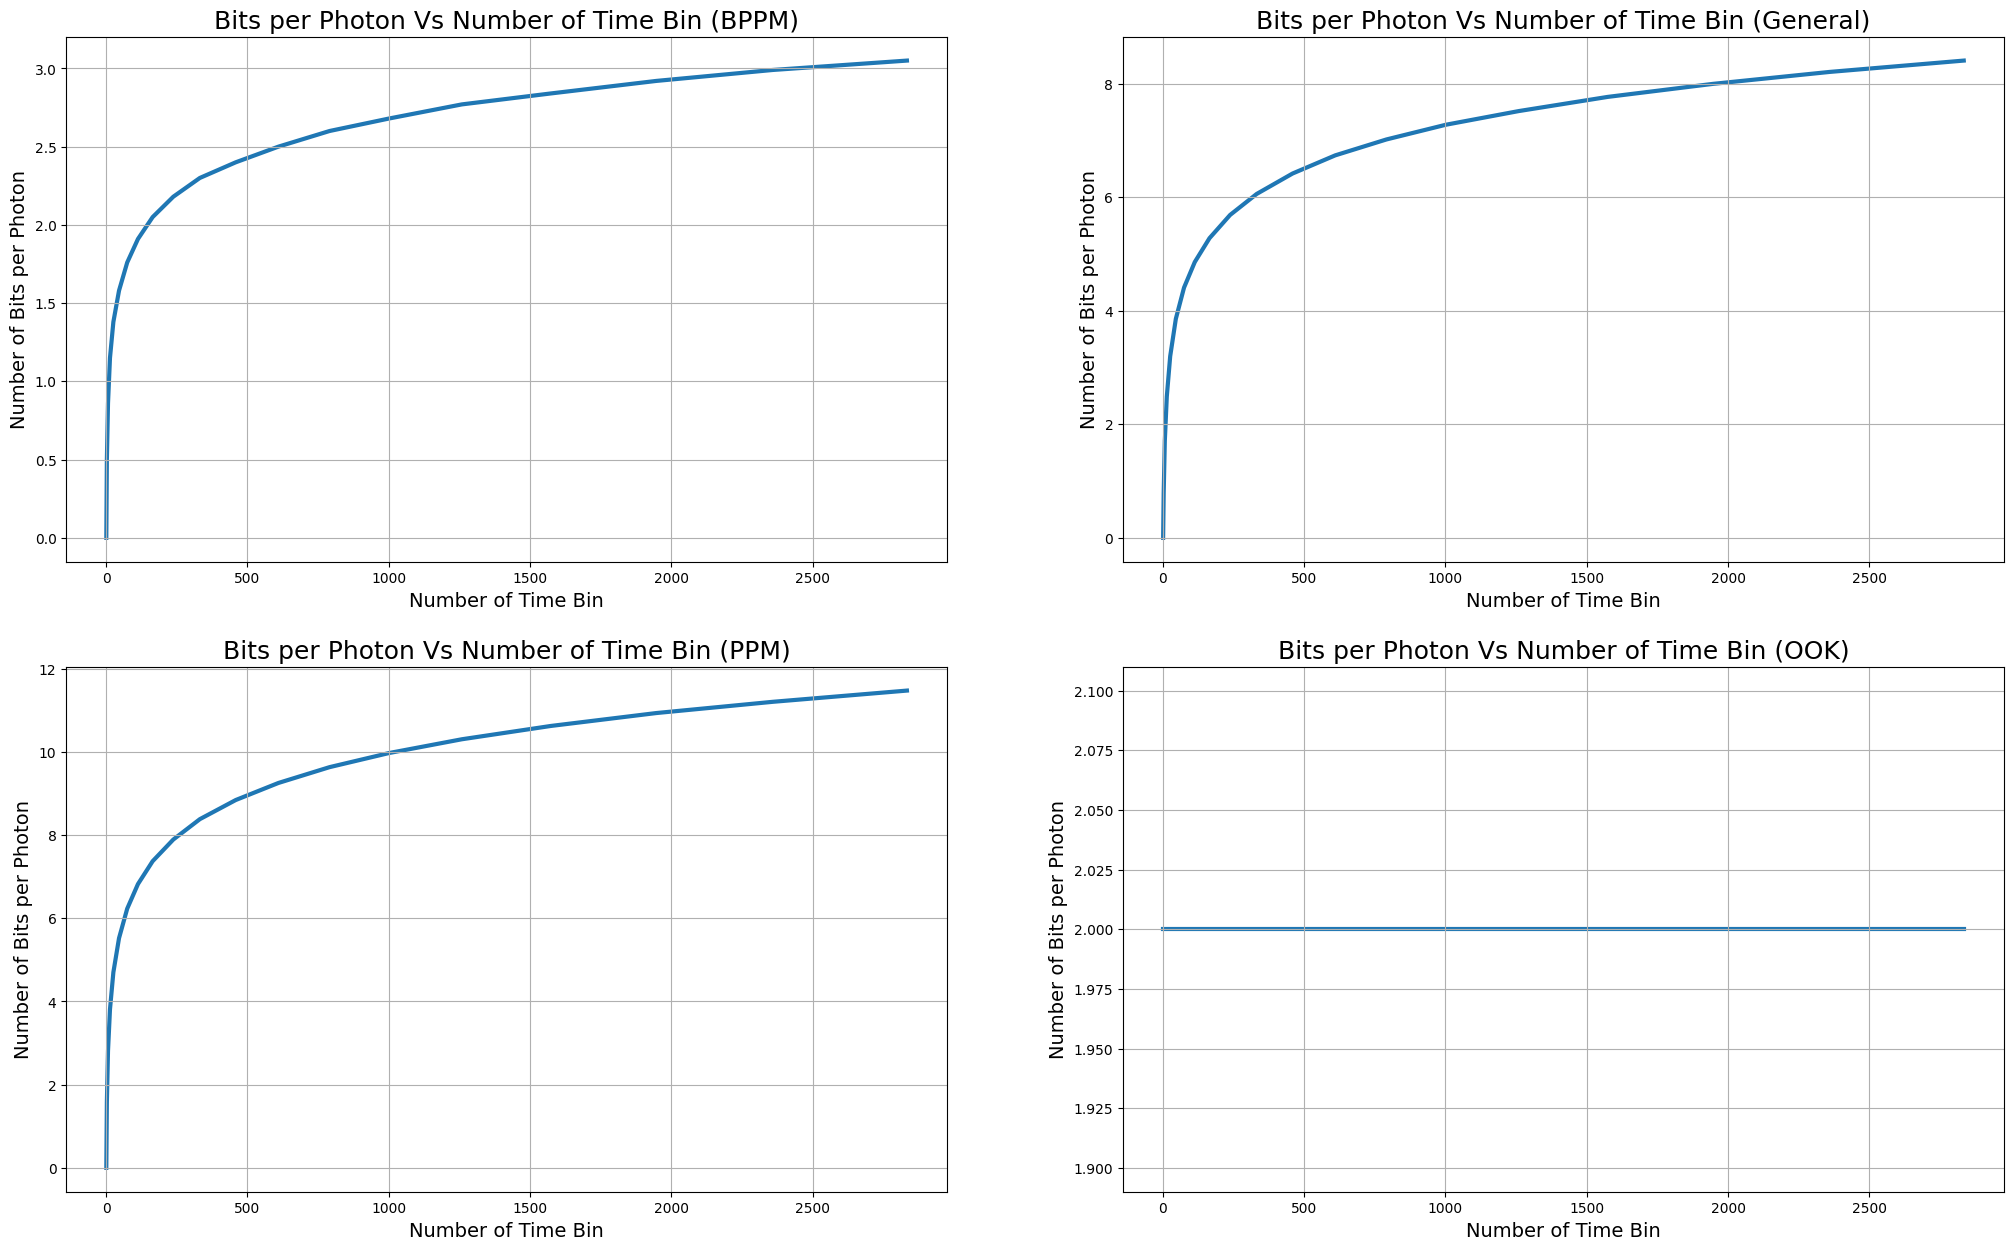

In [117]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_Jonas[df_Jonas.columns[1]],df_Jonas[df_Jonas.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[0, 0].set_title('Bits per Photon Vs Number of Time Bin (BPPM)' , fontsize = 18)
axis[0, 0].set_xlabel('Number of Time Bin', fontsize = 14)
axis[0, 0].set_ylabel('Number of Bits per Photon', fontsize = 14)
axis[0, 0].grid(True)

axis[0, 1].plot(df_General_c[df_General_c.columns[1]],df_General_c[df_General_c.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[0, 1].set_title('Bits per Photon Vs Number of Time Bin (General)' , fontsize = 18)
axis[0, 1].set_xlabel('Number of Time Bin', fontsize = 14)
axis[0, 1].set_ylabel('Number of Bits per Photon', fontsize = 14)
axis[0, 1].grid(True)

axis[1, 0].plot(df_PPM[df_PPM.columns[1]],df_PPM[df_PPM.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[1, 0].set_title('Bits per Photon Vs Number of Time Bin (PPM)' , fontsize = 18)
axis[1, 0].set_xlabel('Number of Time Bin', fontsize = 14)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 14)
axis[1, 0].grid(True)

axis[1, 1].plot(df_OOK[df_OOK.columns[1]],df_OOK[df_OOK.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Bits per Photon Vs Number of Time Bin (OOK)' , fontsize = 18)
axis[1, 1].set_xlabel('Number of Time Bin', fontsize = 14)
axis[1, 1].set_ylabel('Number of Bits per Photon', fontsize = 14)
axis[1, 1].grid(True)

figure.set_facecolor("white")
plt.savefig('protocol/4SchemesBPP_TImeBin.png', dpi=450, bbox_inches='tight')
plt.show()

## Bits/ Time Bin Versus Time Bin over 4 Schemes

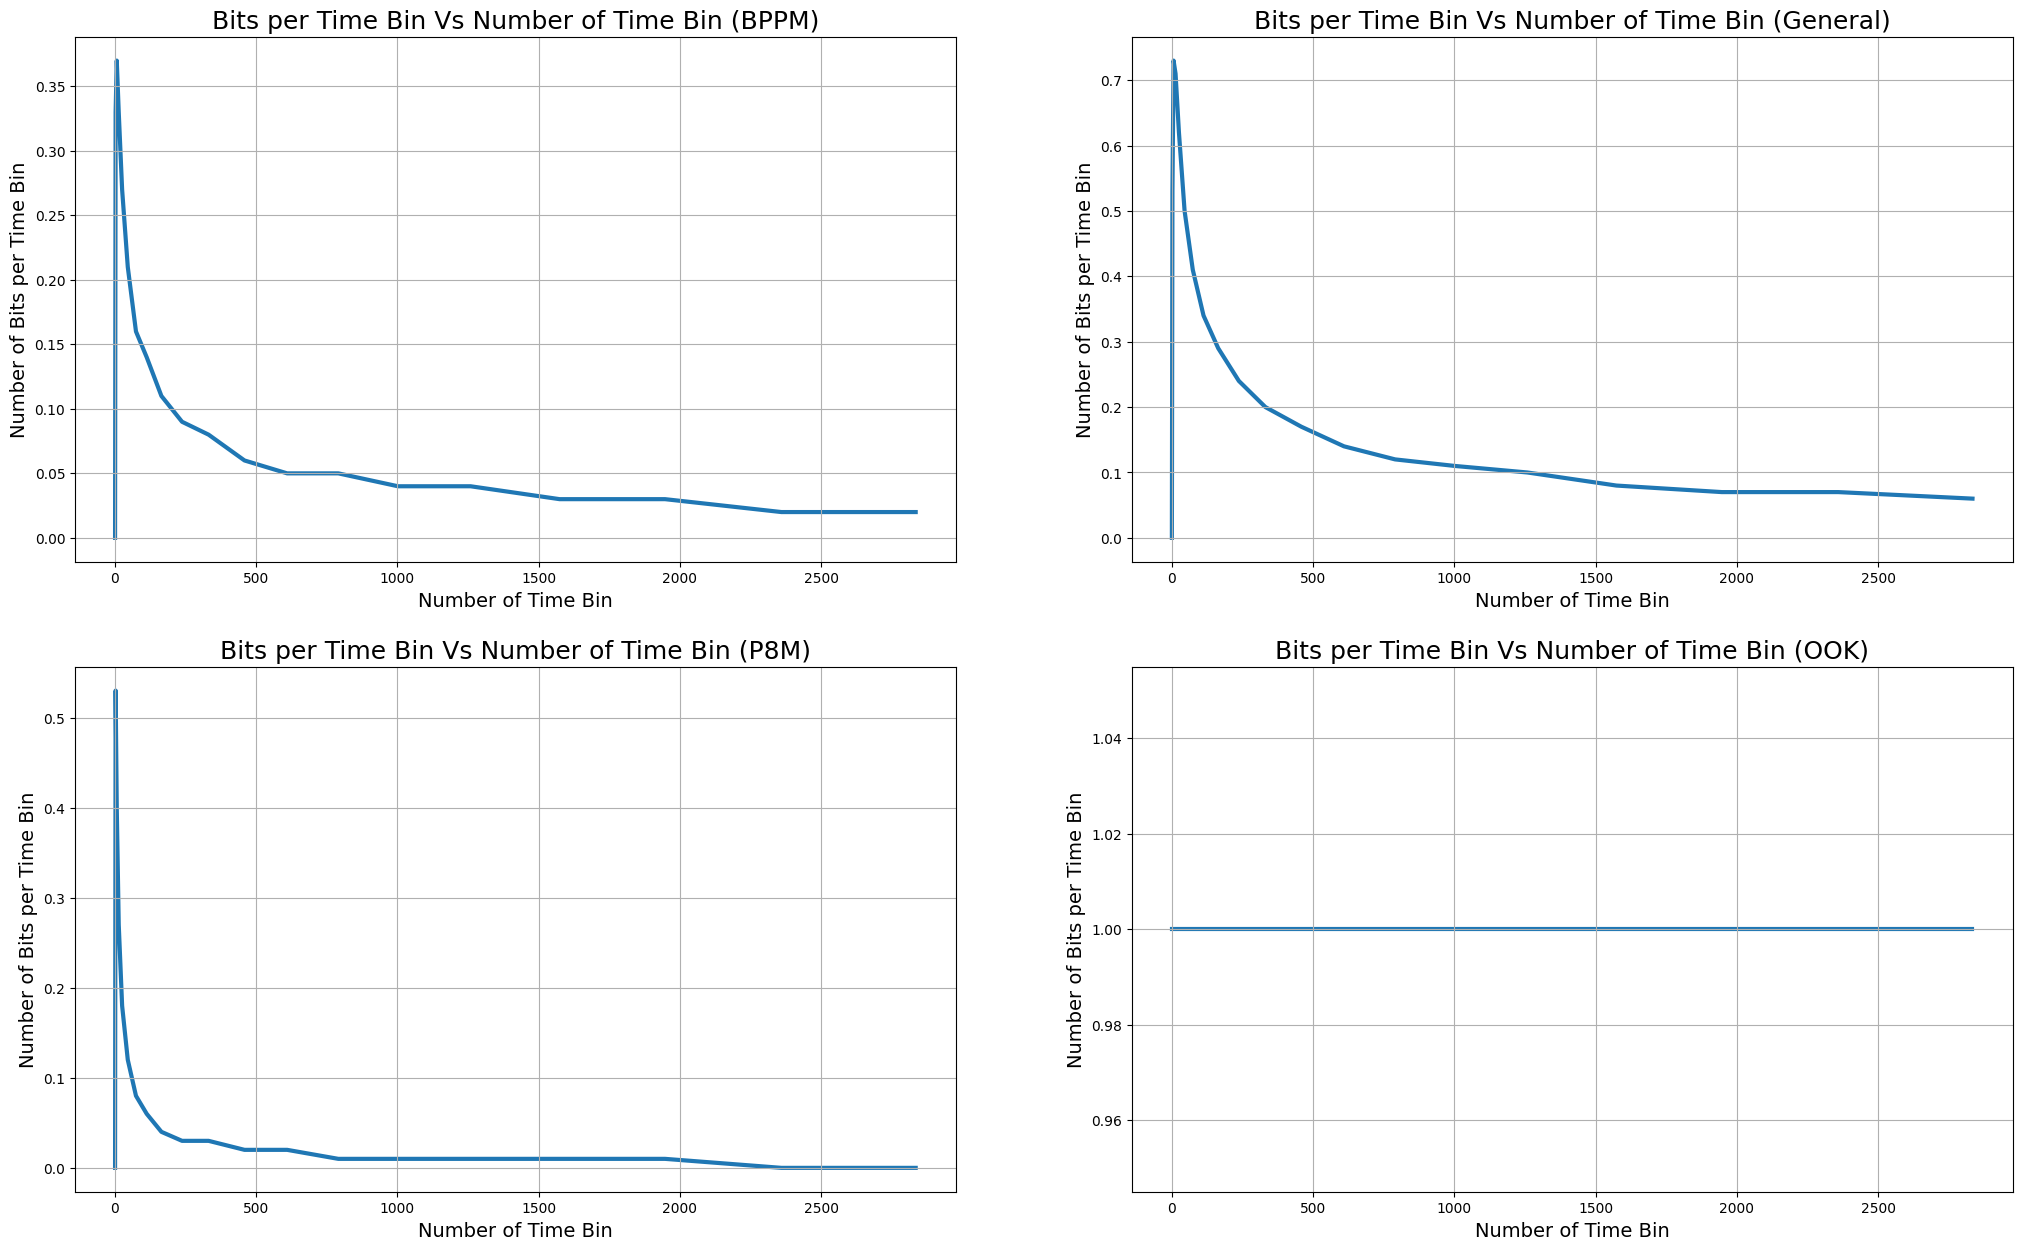

In [118]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_Jonas[df_Jonas.columns[1]],df_Jonas[df_Jonas.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[0, 0].set_title('Bits per Time Bin Vs Number of Time Bin (BPPM)', fontsize = 18)
axis[0, 0].set_xlabel('Number of Time Bin', fontsize = 14)
axis[0, 0].set_ylabel('Number of Bits per Time Bin', fontsize = 14)
axis[0, 0].grid(True)

axis[0, 1].plot(df_General_c[df_General_c.columns[1]],df_General_c[df_General_c.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[0, 1].set_title('Bits per Time Bin Vs Number of Time Bin (General)', fontsize = 18)
axis[0, 1].set_xlabel('Number of Time Bin', fontsize = 14)
axis[0, 1].set_ylabel('Number of Bits per Time Bin', fontsize = 14)
axis[0, 1].grid(True)

axis[1, 0].plot(df_PPM[df_PPM.columns[1]],df_PPM[df_PPM.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 0].set_title('Bits per Time Bin Vs Number of Time Bin (P8M)', fontsize = 18)
axis[1, 0].set_xlabel('Number of Time Bin', fontsize = 14)
axis[1, 0].set_ylabel('Number of Bits per Time Bin', fontsize = 14)
axis[1, 0].grid(True)

axis[1, 1].plot(df_OOK[df_OOK.columns[1]],df_OOK[df_OOK.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Bits per Time Bin Vs Number of Time Bin (OOK)', fontsize = 18)
axis[1, 1].set_xlabel('Number of Time Bin', fontsize = 14)
axis[1, 1].set_ylabel('Number of Bits per Time Bin', fontsize = 14)
axis[1, 1].grid(True)

figure.set_facecolor("white")
#plt.xticks(x)
plt.savefig('protocol/4schemesBPT_TimeBin.png', dpi=450, bbox_inches='tight')
plt.show()

## Bits/Time Bin versus Photon

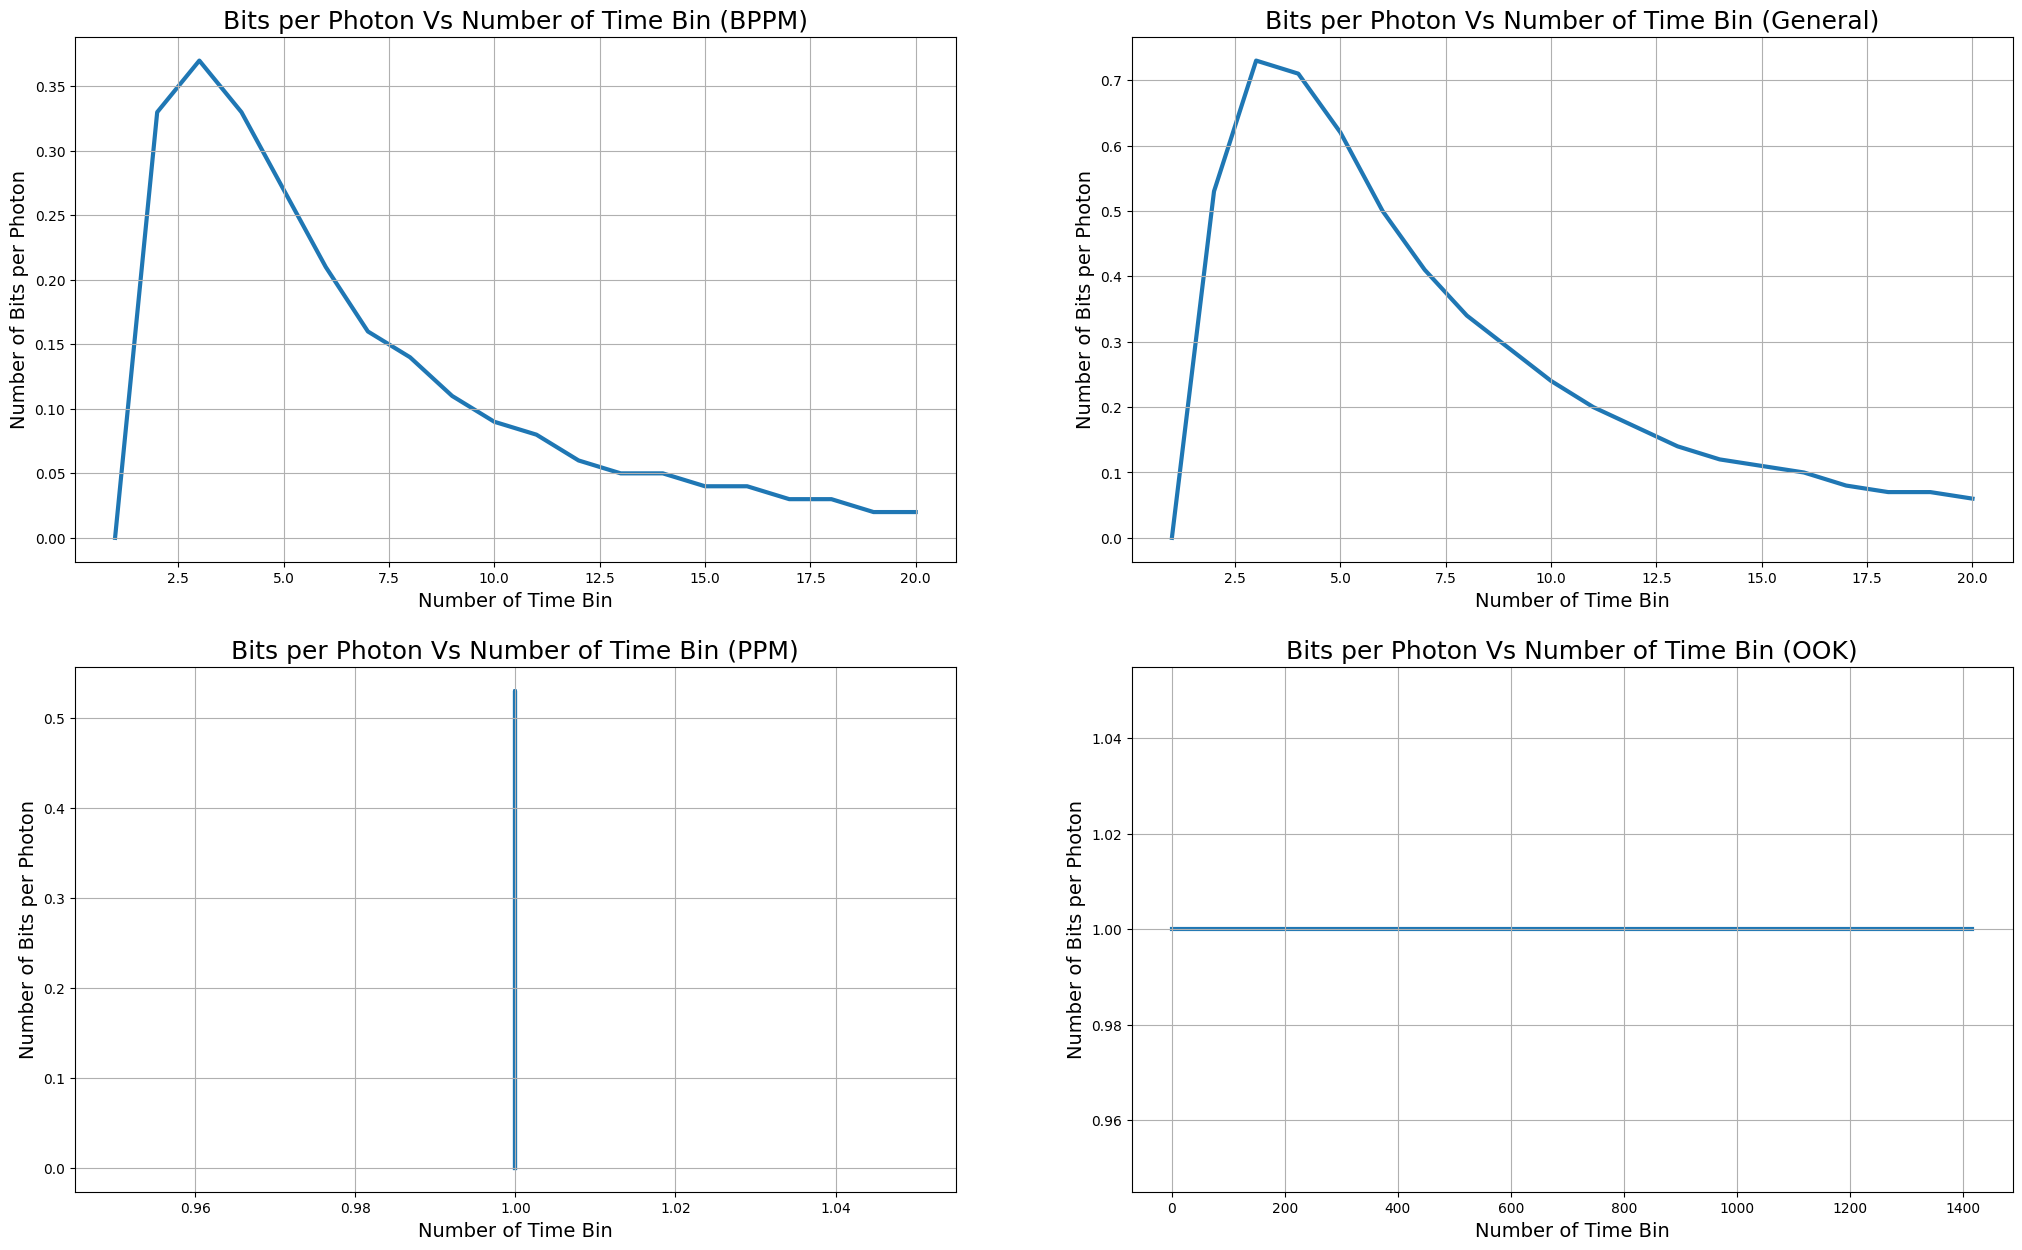

In [121]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_Jonas[df_Jonas.columns[0]],df_Jonas[df_Jonas.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[0, 0].set_title('Bits per Photon Vs Number of Time Bin (BPPM)' , fontsize = 18)
axis[0, 0].set_xlabel('Number of Time Bin', fontsize = 14)
axis[0, 0].set_ylabel('Number of Bits per Photon', fontsize = 14)
axis[0, 0].grid(True)

axis[0, 1].plot(df_General_c[df_General_c.columns[0]],df_General_c[df_General_c.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[0, 1].set_title('Bits per Photon Vs Number of Time Bin (General)' , fontsize = 18)
axis[0, 1].set_xlabel('Number of Time Bin', fontsize = 14)
axis[0, 1].set_ylabel('Number of Bits per Photon', fontsize = 14)
axis[0, 1].grid(True)

axis[1, 0].plot(df_PPM[df_PPM.columns[0]],df_PPM[df_PPM.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 0].set_title('Bits per Photon Vs Number of Time Bin (PPM)' , fontsize = 18)
axis[1, 0].set_xlabel('Number of Time Bin', fontsize = 14)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 14)
axis[1, 0].grid(True)

axis[1, 1].plot(df_OOK[df_OOK.columns[0]],df_OOK[df_OOK.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Bits per Photon Vs Number of Time Bin (OOK)' , fontsize = 18)
axis[1, 1].set_xlabel('Number of Time Bin', fontsize = 14)
axis[1, 1].set_ylabel('Number of Bits per Photon', fontsize = 14)
axis[1, 1].grid(True)

figure.set_facecolor("white")
plt.savefig('protocol/4SchemesBPT_Photon.png', dpi=450, bbox_inches='tight')
plt.show()

# Finding a good power ratio 

In [105]:
import pandas as pd
import math
from fractions import Fraction

#series = [1, 3, 7, 14, 26, 46, 75, 113, 165, 238, 332, 459, 610, 791, 1002]

df_BPPM = pd.DataFrame(columns=['|Photo Number (BPPM))|', 
                                 'Time Bins (BPPM)|',
                                 'Photon Number (PPM)',
                                 'Time Bin (PPM)|',
                                 'Power Ratio (3 d.p.) (BPPM)|',
                                 'Power Ratio (3 d.p.) (PPM)|',
                                 ]      
                  )

for n in range(1,101):
    BPPMways = math.factorial(n)         # A2. The number of possible symbols, m, will be m=k \\
    BPPMTimeBin = length[n-1]            # A1. The number of slots n with Jonas method. n=Sum(First k integers in the series) \\
    BPPMPowerRatio = round(n / BPPMTimeBin, 3)
    PPMPhotonNumber =  1
    PPMTimeBin = n
    PPMPowerRatio = round(1 / n, 3)
    

    df_BPPM.loc[len(df_BPPM)] = [n, BPPMTimeBin, PPMPhotonNumber, PPMTimeBin, BPPMPowerRatio, PPMPowerRatio]

IndexError: list index out of range

In [ ]:
table_str = df_BPPM.to_string(index=False)
print(table_str)
#df_Jonas # 4th one data is correct

Values matched for BPPM photon number and PPM time bin
<br>5,5 
<br>6,8 
<br>7,11 
<br>8,14 
<br>9,18 
<br>10,24 
<br>11,30 
<br>12,38 
<br>13,47 

In [ ]:
df_BPPM.to_csv('power_ratio.csv', index=False)

In [ ]:
from PIL import Image

image = Image.new('RGB', (800, 600), (255, 255, 255))


In [ ]:
from PIL import Image, ImageDraw, ImageFont

image = Image.new('RGB', (800, 600), (255, 255, 255))
draw = ImageDraw.Draw(image)


In [ ]:
from PIL import Image, ImageDraw, ImageFont

image = Image.new('RGB', (800, 600), (255, 255, 255))
draw = ImageDraw.Draw(image)

font = ImageFont.load_default()
text_color = (0, 0, 0)
text_position = (50, 50)
draw.text(text_position, table_str, font=font, fill=text_color)


In [ ]:
image.save('protocol/power_ratio.png')


In [ ]:
# https://www.geeksforgeeks.org/pandas-set_option-function-in-python/
# https://www.geeksforgeeks.org/pandas-set_option-function-in-python/
# https://stackoverflow.com/questions/35634238/how-to-save-a-pandas-dataframe-table-as-a-png
# https://towardsdatascience.com/6-pandas-display-options-you-should-memories-84adf8887bc3
# https://dash.plotly.com/datatable/width
# https://randomds.com/2021/12/23/visualize-and-save-full-pandas-dataframes-as-images/
# https://randomds.com/2021/12/23/visualize-and-save-full-pandas-dataframes-as-images/\
# https://www.adamsmith.haus/python/answers/how-to-print-a-number-in-scientific-notation-in-python
# https://www.scaler.com/topics/python-scientific-notation/
# https://stackoverflow.com/questions/20457038/how-to-round-to-2-decimals-with-python
# https://pythonfix.com/pkg/d/dataframe-image/